<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [31]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [32]:
#load dataset
sat = pd.read_csv('./sat_scores.csv')
#put it in dict
sat_dict = sat.to_dict()
#display dict
sat_dict

{'Math': {0: 510L,
  1: 513L,
  2: 515L,
  3: 505L,
  4: 516L,
  5: 499L,
  6: 499L,
  7: 506L,
  8: 500L,
  9: 501L,
  10: 499L,
  11: 510L,
  12: 499L,
  13: 489L,
  14: 501L,
  15: 488L,
  16: 474L,
  17: 526L,
  18: 499L,
  19: 527L,
  20: 499L,
  21: 515L,
  22: 510L,
  23: 517L,
  24: 525L,
  25: 515L,
  26: 542L,
  27: 439L,
  28: 539L,
  29: 512L,
  30: 542L,
  31: 553L,
  32: 542L,
  33: 589L,
  34: 550L,
  35: 545L,
  36: 572L,
  37: 589L,
  38: 580L,
  39: 554L,
  40: 568L,
  41: 561L,
  42: 577L,
  43: 562L,
  44: 596L,
  45: 550L,
  46: 570L,
  47: 603L,
  48: 582L,
  49: 599L,
  50: 551L,
  51: 514L},
 'Rate': {0: 82L,
  1: 81L,
  2: 79L,
  3: 77L,
  4: 72L,
  5: 71L,
  6: 71L,
  7: 69L,
  8: 69L,
  9: 68L,
  10: 67L,
  11: 65L,
  12: 65L,
  13: 63L,
  14: 60L,
  15: 57L,
  16: 56L,
  17: 55L,
  18: 54L,
  19: 53L,
  20: 53L,
  21: 52L,
  22: 51L,
  23: 51L,
  24: 34L,
  25: 33L,
  26: 31L,
  27: 26L,
  28: 23L,
  29: 18L,
  30: 17L,
  31: 13L,
  32: 13L,
  33: 12L,
  34:

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [33]:
#dataframe with a dict
df_sat = pd.DataFrame(sat_dict)
#display first 5 rows
df_sat.head()
#show columns type
df_sat.dtypes

Math       int64
Rate       int64
State     object
Verbal     int64
dtype: object

In [34]:
#dataframe with a csv file
df_sats = pd.read_csv('./sat_scores.csv')
#show columns type
df_sats.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

**The ONLY difference is that a csv to dataframe remains the order of the original csv, while the dictionary to dataframe shuffles order of columns alphabetically.**

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [35]:
#display first ten rows of df ('df_sats' from csv function)
df_sats.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [36]:
df_sats.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [37]:
#dict obj describing data contain 1) NAME of all columns,2) type of variables,3) descn of variable,4) shape of data

#declare empty dictionary
dt_dict = {}
#add values to the 4 keys
dt_dict['Columns'] = df_sats.columns #from csv
dt_dict['Type of Variable'] = df_sats.dtypes
dt_dict['Description'] = df_sats.describe()
dt_dict['Shape'] = df_sats.shape
#display dictionary
dt_dict

{'Columns': Index([u'State', u'Rate', u'Verbal', u'Math'], dtype='object'),
 'Description':             Rate      Verbal        Math
 count  52.000000   52.000000   52.000000
 mean   37.153846  532.019231  531.500000
 std    27.301788   33.236225   36.014975
 min     4.000000  482.000000  439.000000
 25%     9.000000  501.000000  504.000000
 50%    33.500000  526.500000  521.000000
 75%    63.500000  562.000000  555.750000
 max    82.000000  593.000000  603.000000,
 'Shape': (52, 4),
 'Type of Variable': State     object
 Rate       int64
 Verbal     int64
 Math       int64
 dtype: object}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

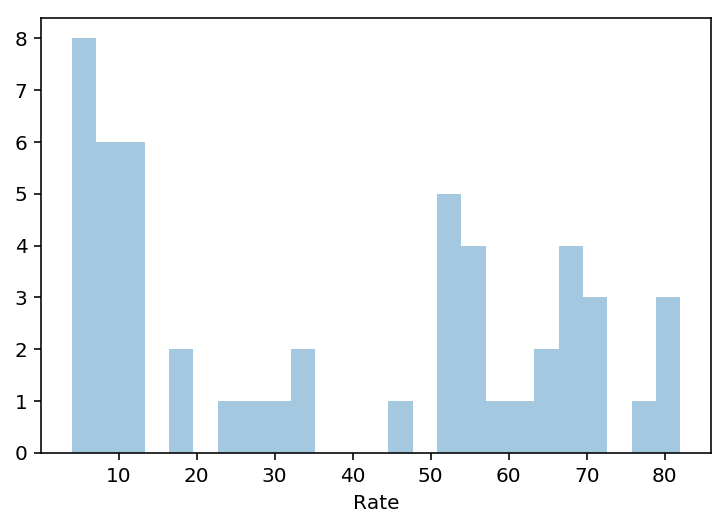

In [182]:
#Plot Rate distplot
sns.distplot(df_sats['Rate'], bins = 25, kde = False)

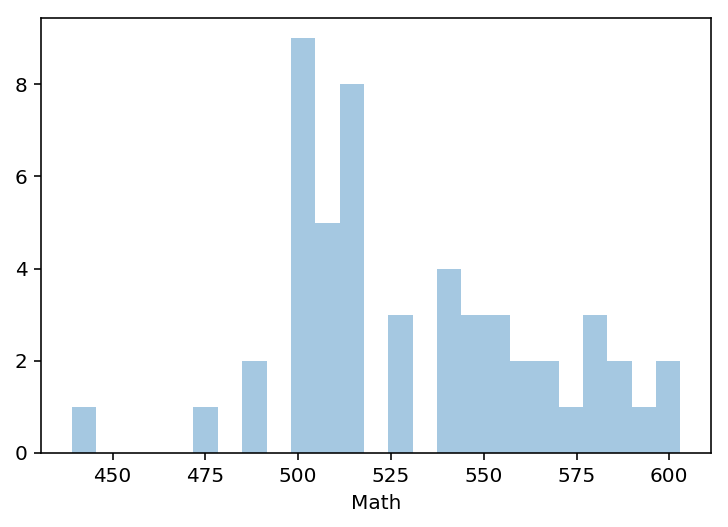

In [39]:
#Plot Math distplot
sns.distplot(df_sats['Math'], bins= 25, kde=False)

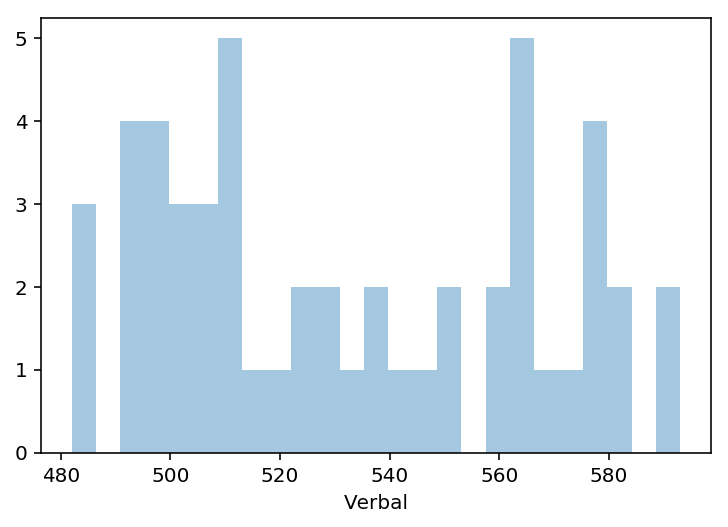

In [40]:
#plot Verbal distplot
sns.distplot(df_sats['Verbal'], bins= 25, kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

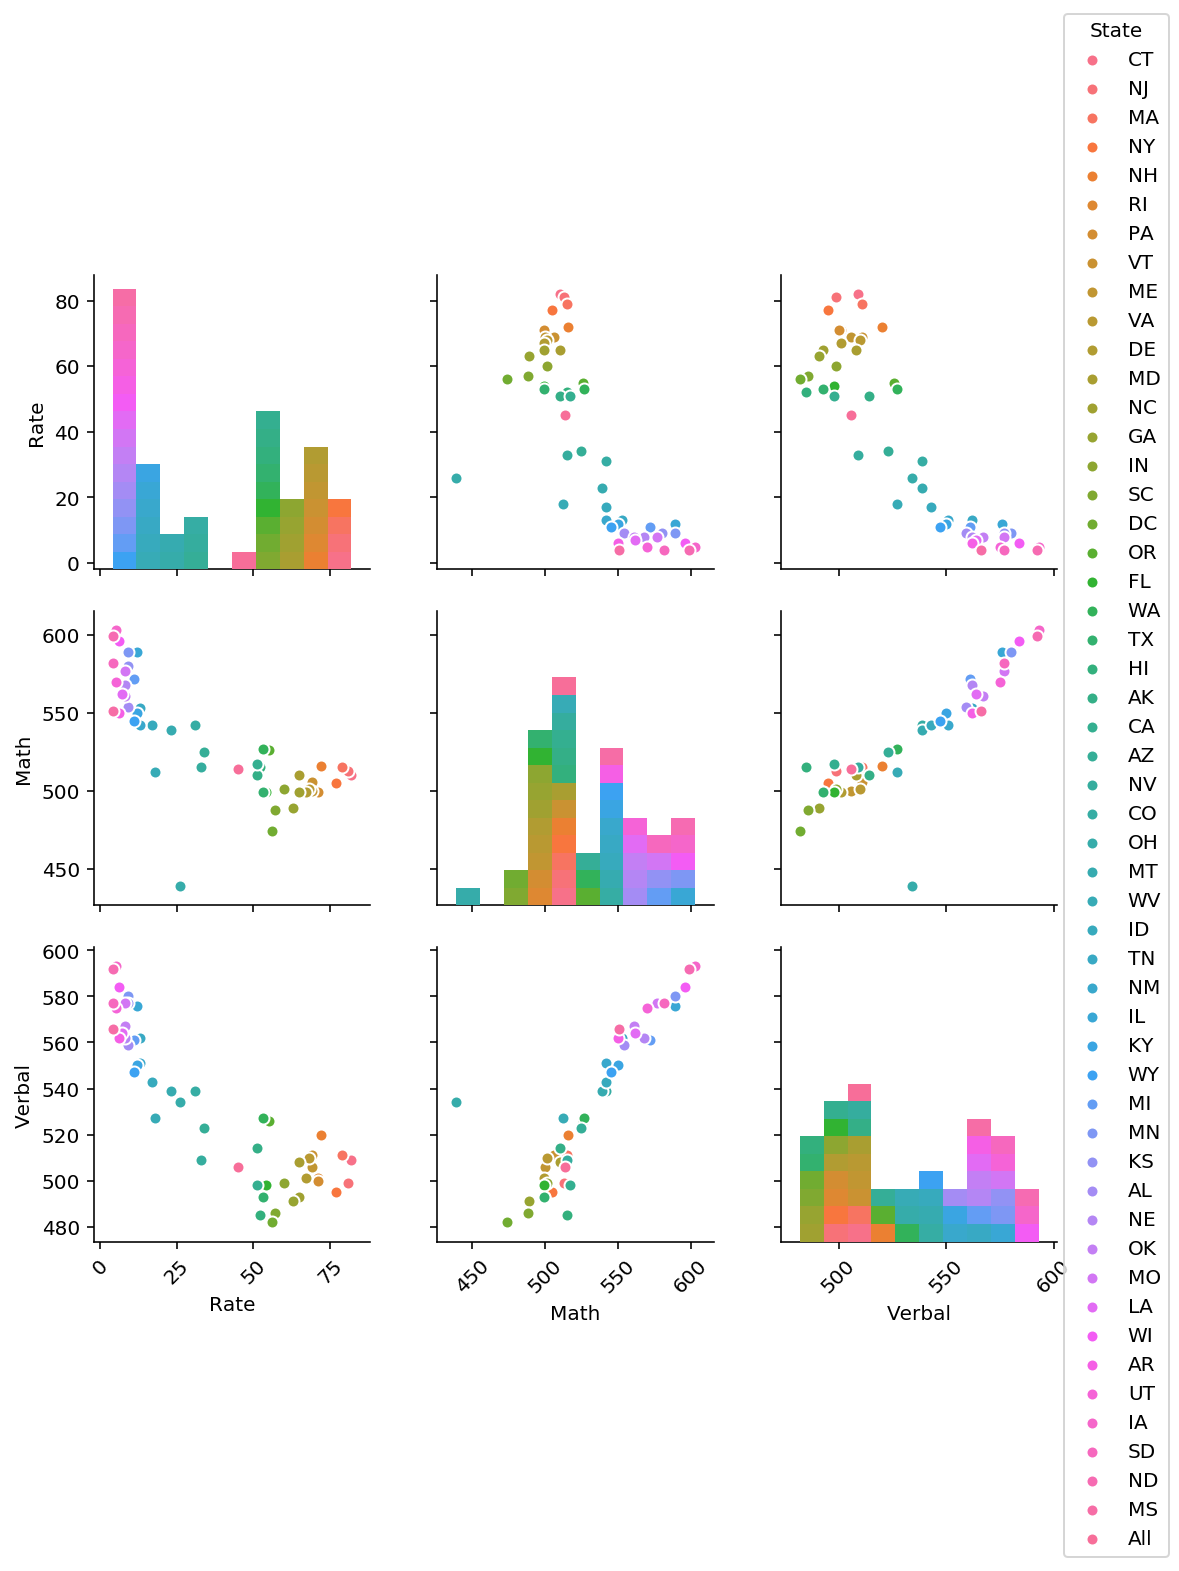

In [184]:
#display Rate, Math, Verbal all on same pairplot
s = sns.pairplot(data = df_sats, vars = ['Rate', 'Math', 'Verbal'],hue='State')
for ax in s.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
    
plt.show()    


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

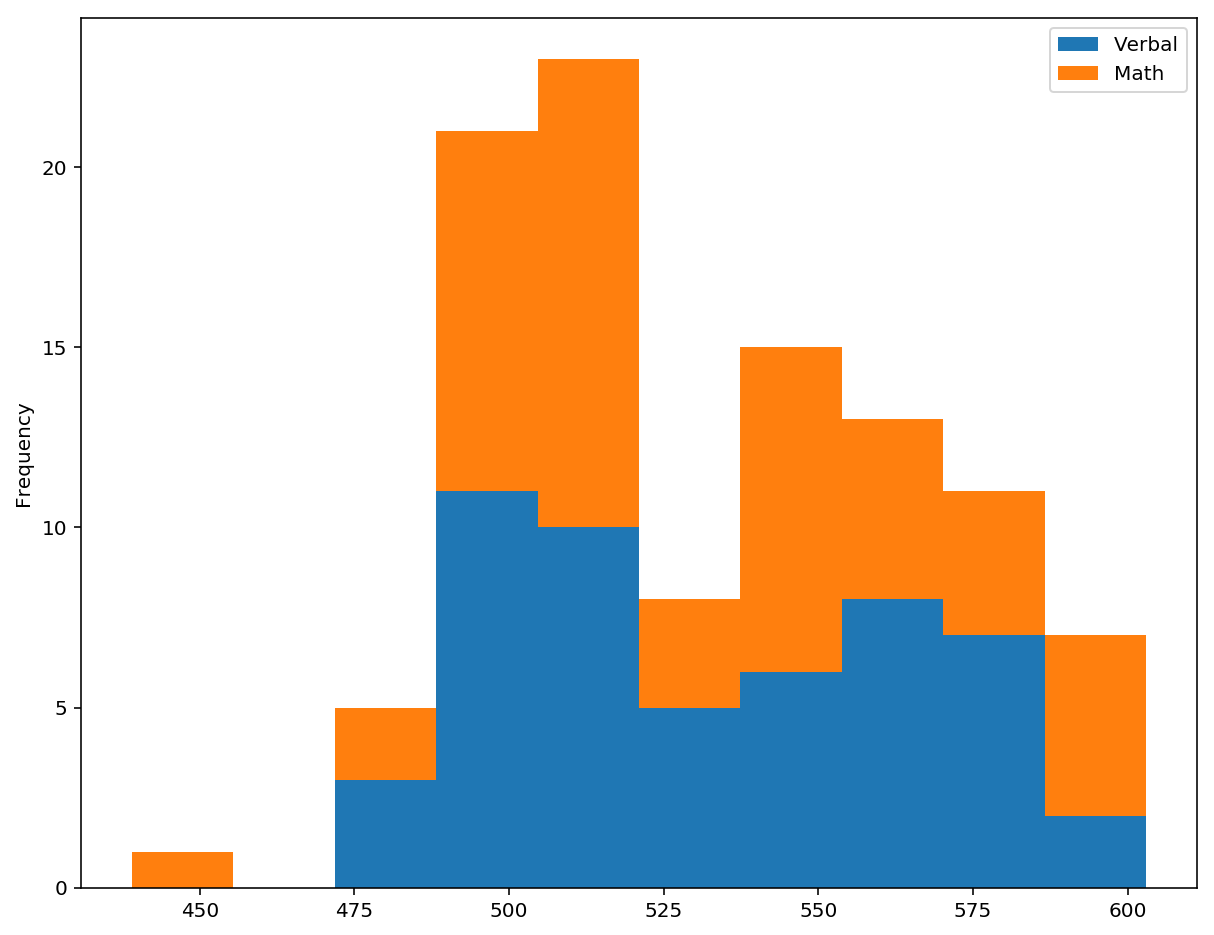

In [185]:
#plot stacked histogram of Verbal and Math
df_sats[['Verbal', 'Math']].plot.hist(stacked = True, figsize = (10,8))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

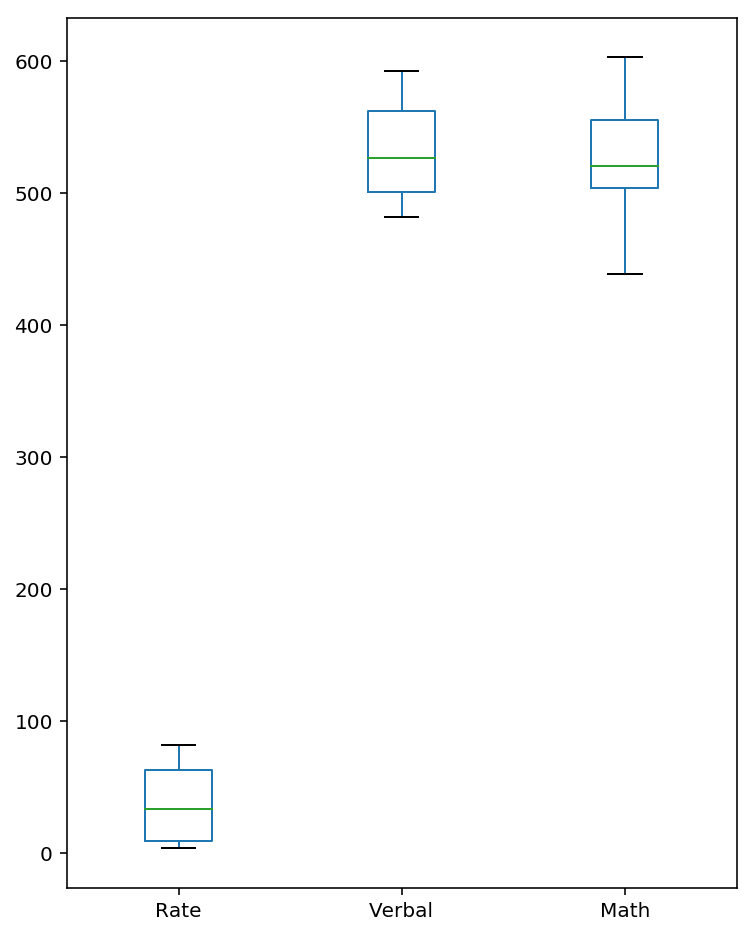

In [43]:
#plot all vars on boxplot
df_sats.plot.box(figsize = (6,8))

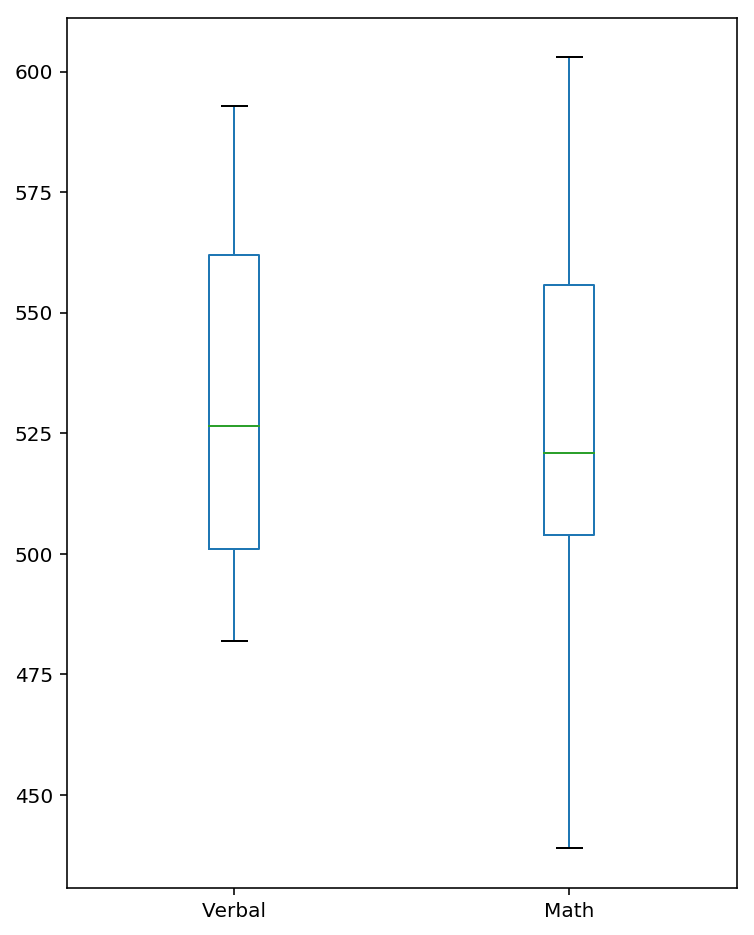

In [44]:
#explores the 2 variables that are in the same range 
df_sats.drop('Rate', axis = 1).plot.box(figsize=(6,8))

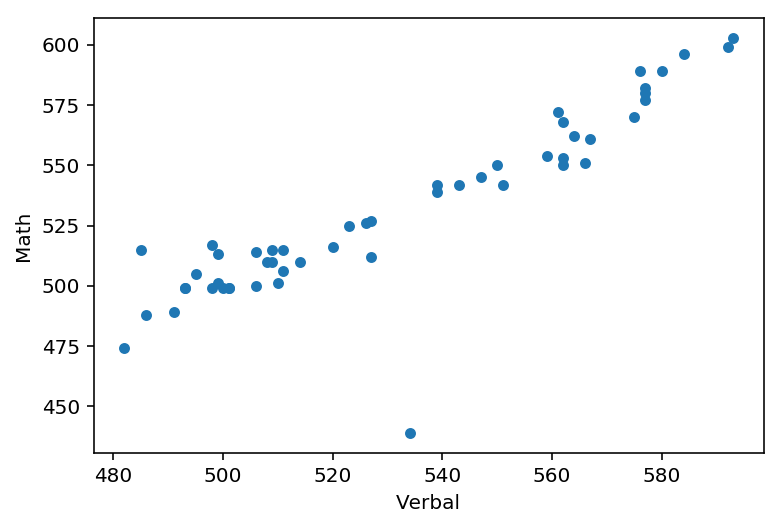

In [45]:
#plot on scatterplot, without rate
df_sats.drop('Rate', axis = 1).plot.scatter(x = "Verbal", y = "Math")

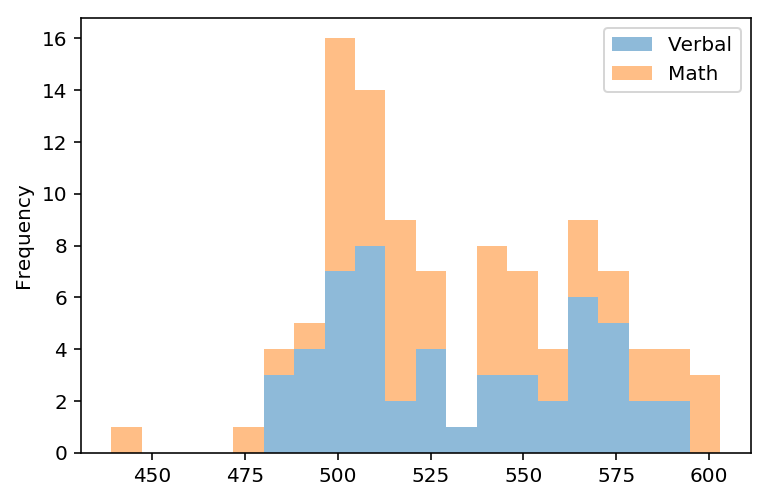

In [46]:
#plot stacked histogram with verbal and math
df_sats[['Verbal', 'Math']].plot.hist(alpha=0.5, stacked=True, bins=20)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


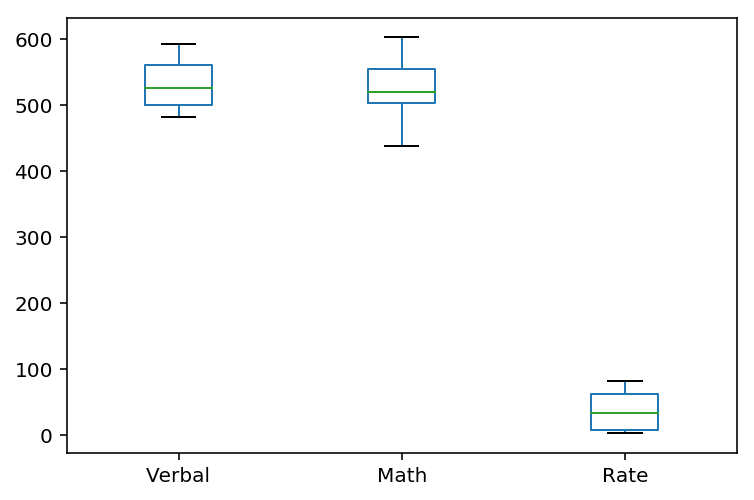

In [135]:
#boxplot from above, this is what NEEDS to be normalized
df_sats[['Verbal', 'Math', 'Rate']].boxplot(grid=False)

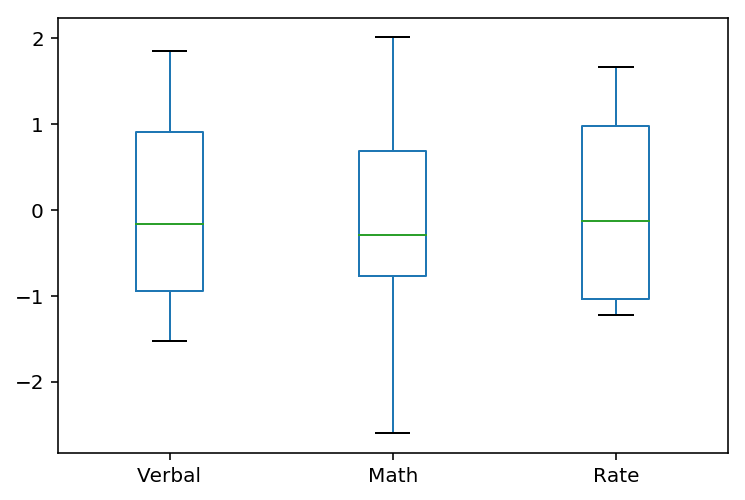

In [138]:
#define a new dataframe
n_sat = df_sats[['Verbal', 'Math', 'Rate']]

#normalizing??? using mean over SD
n_sat_ = n_sat.apply(lambda x:(x - np.mean(x))/(np.std(x)))

#plot normalized data
n_sat_.boxplot(grid=False)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [47]:
#assigning Verbal's mean to a variable
avg_states= np.mean(df_sats['Verbal'])
avg_states

532.0192307692307

In [48]:
#count States more than the overall State mean
df_sats[df_sats['Verbal'] > avg_states].Verbal.count()

24

In [49]:
#display list of States
df_sats[df_sats['Verbal'] > avg_states]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [50]:
med_states= np.median(df_sats['Verbal'])
med_states
#median < mean, right-skewed

526.5

In [51]:
df_sats[df_sats['Verbal'] > med_states].Verbal.count()

26

In [52]:
df_sats[df_sats['Verbal'] > med_states]

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [53]:
df_sats = df_sats.assign(difference = df_sats.Verbal - df_sats.Math)
df_sats

,State,Rate,Verbal,Math,difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [54]:
#10 states, greatest gap of V & M, V > M
verbal_top = df_sats[['State','difference']].sort_values(by='difference', ascending=False).reset_index()
verbal_top.head(10)

,index,State,difference
0,27,OH,95
1,50,MS,15
2,29,WV,15
3,45,AR,12
4,32,NM,9
5,31,TN,9
6,9,VA,9
7,16,DC,8
8,8,ME,6
9,41,OK,6


In [55]:
#10 states, greatest gap of V & M, M > V
math_top = df_sats[['State','difference']].sort_values(by='difference').reset_index()
math_top.head(10)

,index,State,difference
0,21,HI,-30
1,23,CA,-19
2,1,NJ,-14
3,33,IL,-13
4,44,WI,-12
5,36,MI,-11
6,3,NY,-10
7,47,IA,-10
8,37,MN,-9
9,51,All,-8


In [56]:
verbal_top.head(3)

,index,State,difference
0,27,OH,95
1,50,MS,15
2,29,WV,15


In [57]:
math_top.head(3)

,index,State,difference
0,21,HI,-30
1,23,CA,-19
2,1,NJ,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [58]:
df_sats.corr()

,Rate,Verbal,Math,difference
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
difference,-0.101412,0.052600,-0.388219,1.000000


# ans: good correlation between math and verbal scores

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [59]:
df_sats.describe()

,Rate,Verbal,Math,difference
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [143]:
df_sats_cov = df_sats.cov()
df_sats_cov

,Rate,Verbal,Math,difference,Rate Percentile
Rate,745.387632,-804.355958,-760.803922,-43.552036,776.432881
Verbal,-804.355958,1104.646682,1077.147059,27.499623,-846.662896
Math,-760.803922,1077.147059,1297.078431,-219.931373,-825.000000
difference,-43.552036,27.499623,-219.931373,247.430995,-21.662896
Rate Percentile,776.432881,-846.662896,-825.000000,-21.662896,848.561318


# Covariance and correlation describe how two variables are related.
# Variables are positively related if they move in the same direction.
# Variables are inversely related if they move in opposite directions.
# Both covariance and correlation indicate whether variables are positively or inversely related. 
# Correlation also tells you the degree to which the variables tend to move together.



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [103]:
# drugs = pd.read_csv('./drug-use-by-age.csv')
# drugs.applymap(lambda x: np.nan if x == '-' else x) use this

#load csv
drugs=pd.read_csv('./drug-use-by-age.csv')
#replace '-' with NaN
drugs=drugs.replace('-', np.NaN)
drugs.describe()
#for all rows and for columns from index 1 onwards, convert to float
drug = drugs.iloc[:,1:].astype(float)
#add age to new variable as age was removed
drug['age'] = drugs['age']
drug

#age was pushed to being the last column, so place it back to the front
#place all columns to list
cols = drug.columns.tolist()
cols
#add last column to first column
cols = cols[-1:] + cols[:-1]
cols
#add the newly adjusted columns to the drug dataframe
drug = drug[cols]  #    OR    df = df.ix[:, cols]
#displayyyyy
drug

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798.0,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757.0,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792.0,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956.0,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058.0,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038.0,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469.0,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223.0,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271.0,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354.0,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [104]:
drug.dtypes

age                         object
n                          float64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [145]:
data = drugs.iloc[:,1:].astype(float)
data

#drop n column
drugs_no_n = data.drop('n', axis=1)
#drop columns displaying freq and save it to a variable
drugs_usage = drugs_no_n.drop(drugs_no_n.filter(regex='-frequency'), axis=1)
drugs_usage.describe()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


In [186]:
#drop columns displaying usage and save it to a variable
drugs_freq = drugs_no_n.drop(drugs_no_n.filter(regex='-use'), axis=1)
drugs_freq.describe()

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
count,17.000000,17.000000,16.000000,14.000000,16.000000,17.000000,16.000000,17.000000,16.000000,17.000000,17.000000,15.000000,17.000000
mean,33.352941,42.941176,7.875000,15.035714,73.281250,8.411765,6.156250,14.705882,14.812500,11.735294,31.147059,35.966667,19.382353
std,21.318833,18.362566,8.038449,18.111263,70.090173,15.000245,4.860448,6.935098,12.798275,11.485205,85.973790,31.974581,24.833527
min,3.000000,4.000000,1.000000,1.000000,1.000000,2.000000,2.000000,7.000000,3.000000,4.500000,2.000000,2.000000,3.000000
25%,10.000000,30.000000,5.000000,5.000000,39.625000,3.000000,3.375000,12.000000,5.750000,6.000000,7.000000,12.000000,6.500000
50%,48.000000,52.000000,5.250000,7.750000,53.750000,3.000000,4.000000,12.000000,12.000000,10.000000,10.000000,30.000000,10.000000
75%,52.000000,52.000000,7.250000,16.500000,71.875000,4.000000,6.625000,15.000000,18.125000,11.000000,12.000000,47.000000,17.500000
max,52.000000,72.000000,36.000000,62.000000,280.000000,52.000000,19.000000,36.000000,46.000000,52.000000,364.000000,105.000000,104.000000


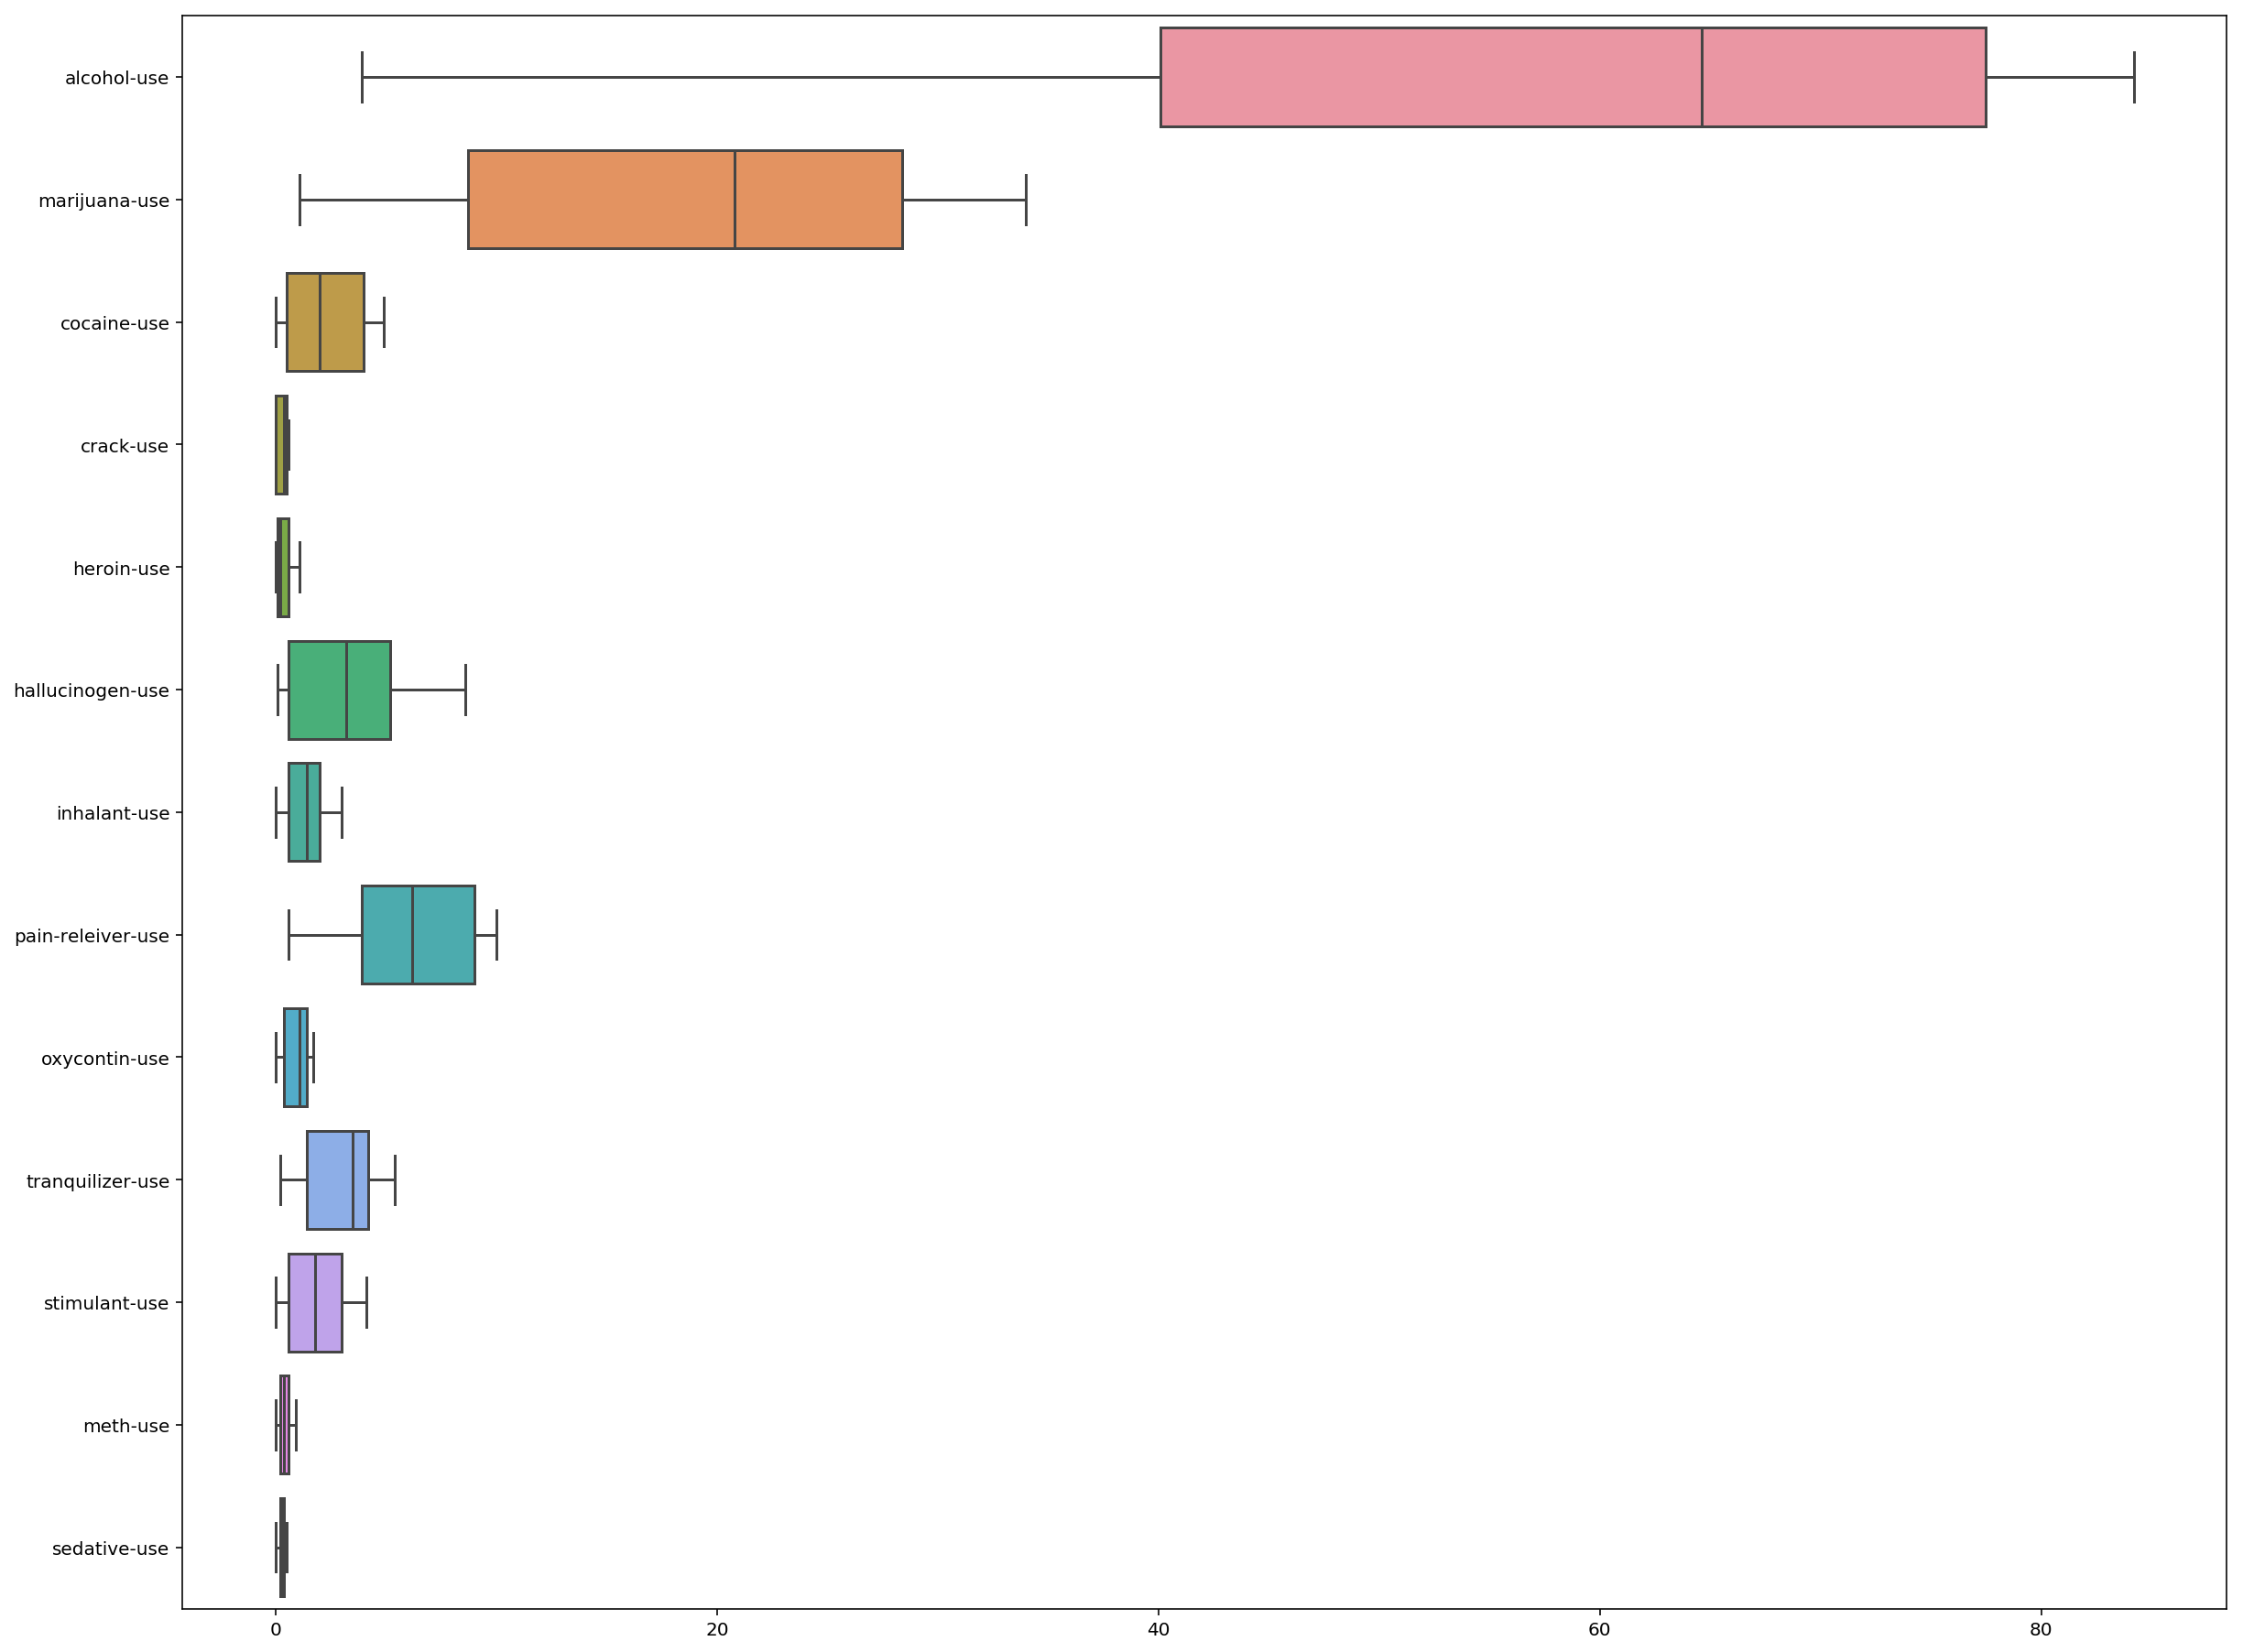

In [151]:
#display drug usage at boxplot
plt.figure(figsize = (20,16))
sns.boxplot(data = drugs_usage, orient ='h')

In [152]:
#normalizing drug usage
norm_usage = (drugs_usage - drugs_usage.mean())/drugs_usage.std()
norm_usage.head()


,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,-1.917098,-1.490293,-1.142945,-1.247469,-0.757849,-1.143818,0.228371,-1.348729,-1.373352,-1.486206,-1.220203,-1.455128,-0.596759
1,-1.745959,-1.297981,-1.142945,-1.247469,-1.057464,-1.000577,1.198949,-1.222402,-1.373352,-1.429173,-1.149164,-1.074556,-1.321394
2,-1.388802,-0.854828,-1.142945,-1.247469,-0.757849,-0.642476,1.306791,-0.748675,-0.880106,-1.086977,-0.793968,-1.074556,-0.596759
3,-0.975838,-0.369868,-0.922774,-0.823329,-0.458234,-0.463425,1.198949,-0.243366,-0.222444,-0.459617,-0.296693,-0.313412,0.852512
4,-0.570315,0.299042,-0.647561,-1.247469,-0.757849,0.002106,1.738159,-0.022293,0.270802,-0.231486,-0.083576,-0.313412,-0.596759


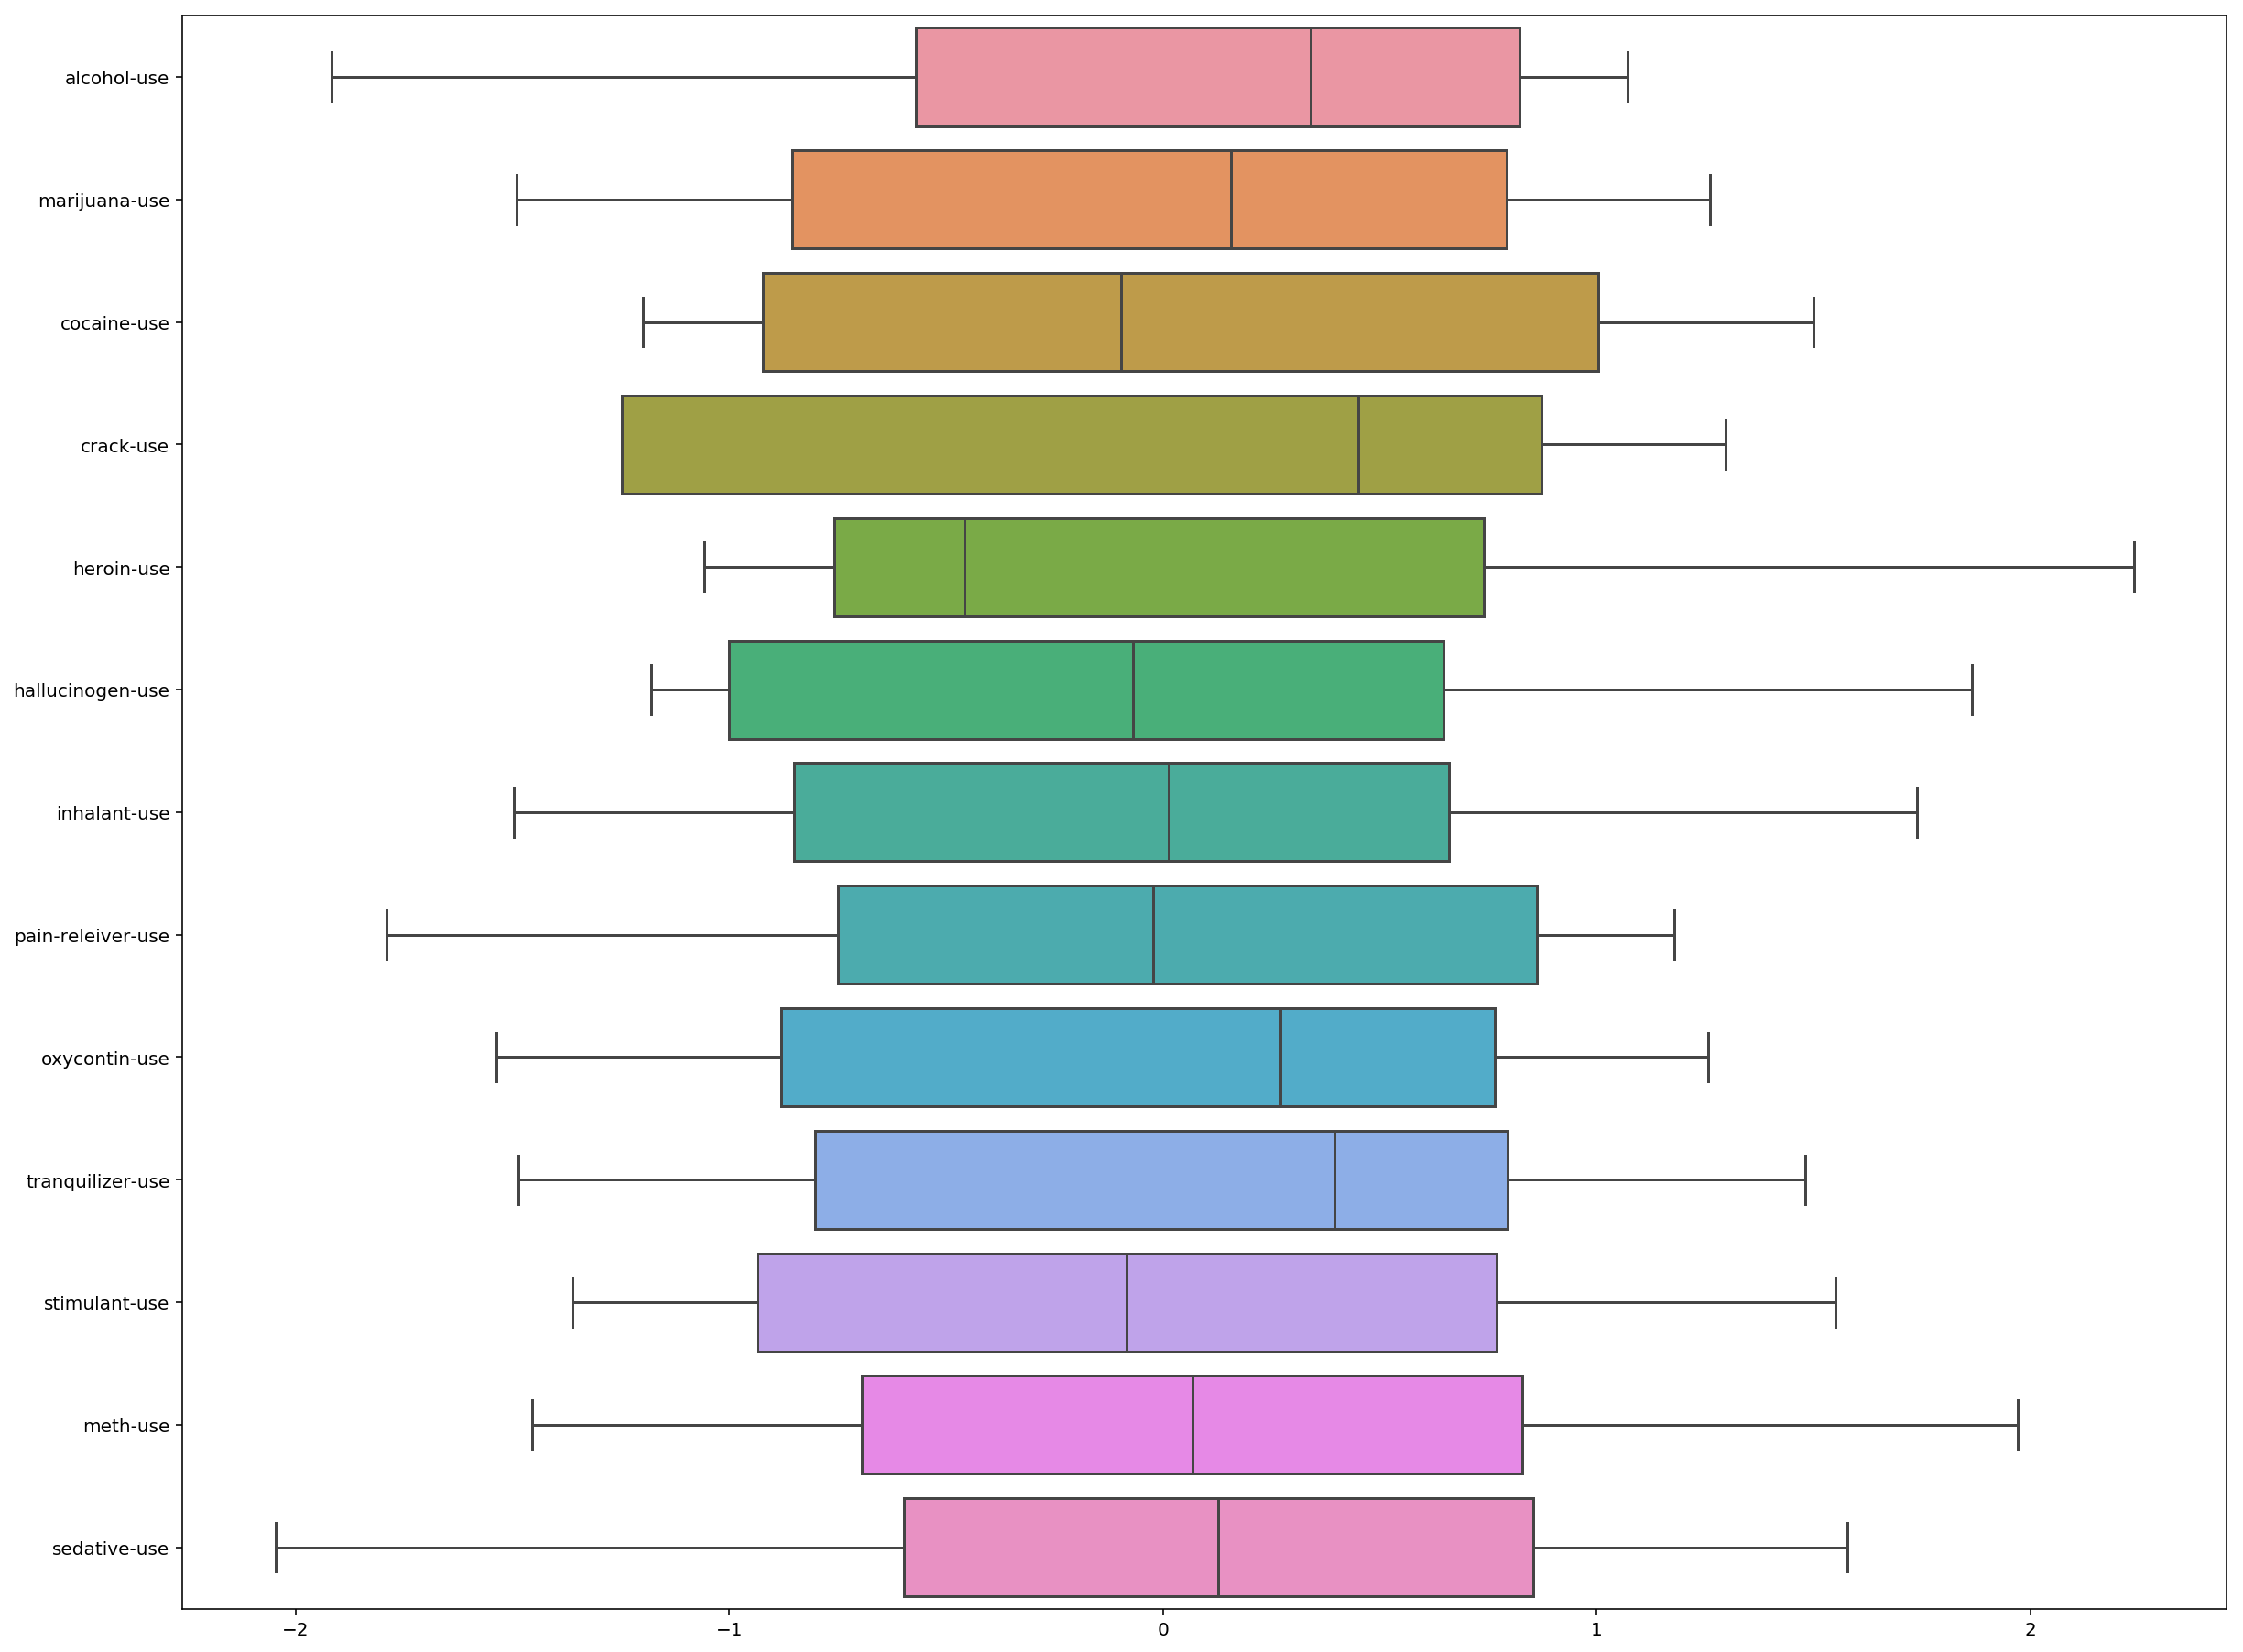

In [153]:
#display normalized drug usage
plt.figure(figsize = (20,16))
sns.boxplot(data = norm_usage, orient ='h')

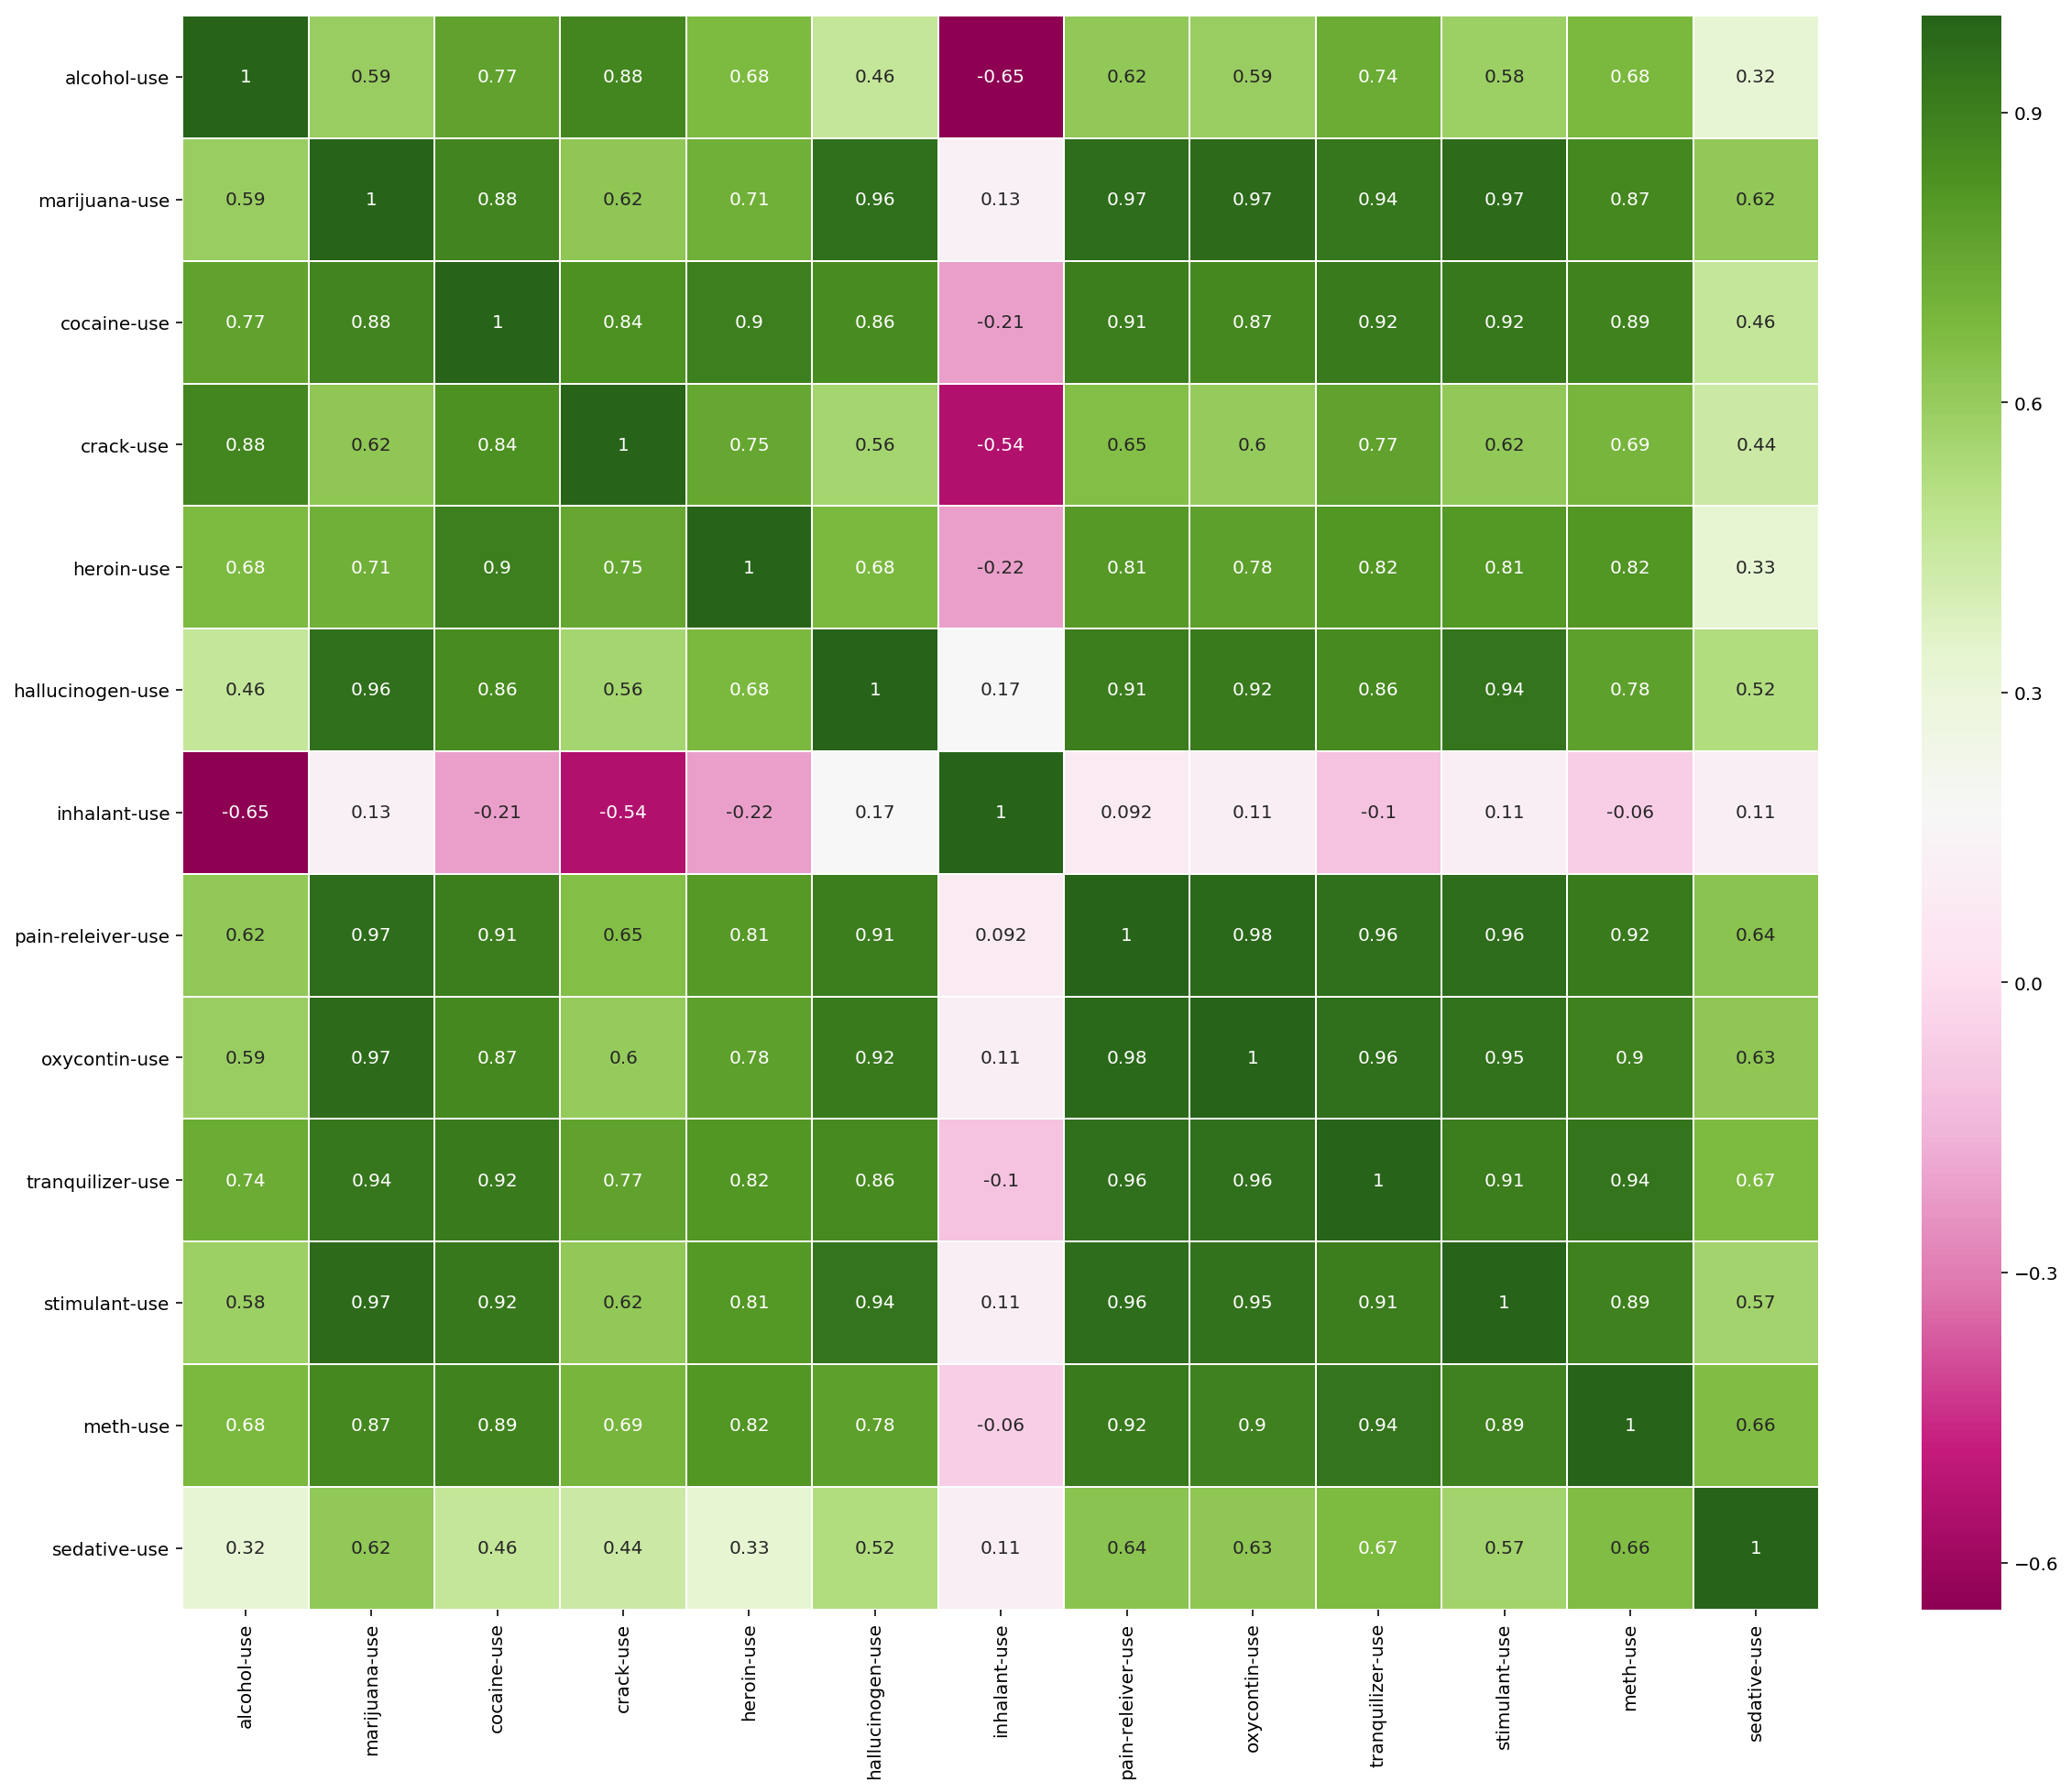

In [178]:
usage_corr = norm_usage.corr()
plt.figure(figsize=(20,16))    
ax = sns.heatmap(usage_corr, linewidth=0.5, cmap = 'PiYG', annot=True)

# turn the axis label
for y in ax.get_yticklabels():
    y.set_rotation(0)

for x in ax.get_xticklabels():
    x.set_rotation(90)

In [155]:
norm_freq = (drugs_freq - drugs_freq.mean())/drugs_freq.std()
norm_freq.head()


,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,-1.423762,-2.120683,-0.357656,NaN,-0.539038,2.905835,2.642503,3.070485,0.756938,3.505789,-0.339023,NaN,-0.257006
1,-1.283041,-1.521638,-0.855264,-0.664543,NaN,-0.160782,1.202307,-0.101784,2.046174,1.198473,-0.315760,-0.968478,-0.015397
2,-1.329948,-1.031510,-0.295455,NaN,-1.016994,-0.360778,-0.237890,-0.390172,-0.805773,-0.586432,-0.222708,-0.374256,-0.116067
3,-1.283041,-0.977052,-0.482058,-0.305650,-1.031261,-0.294113,-0.135018,-0.678560,-0.922976,-0.629966,-0.292497,-0.796466,0.427553
4,-1.095414,-0.704759,-0.108852,-0.774972,-0.096750,-0.360778,-0.649374,-1.111142,-0.844840,-0.064021,-0.251787,0.001042,-0.659687


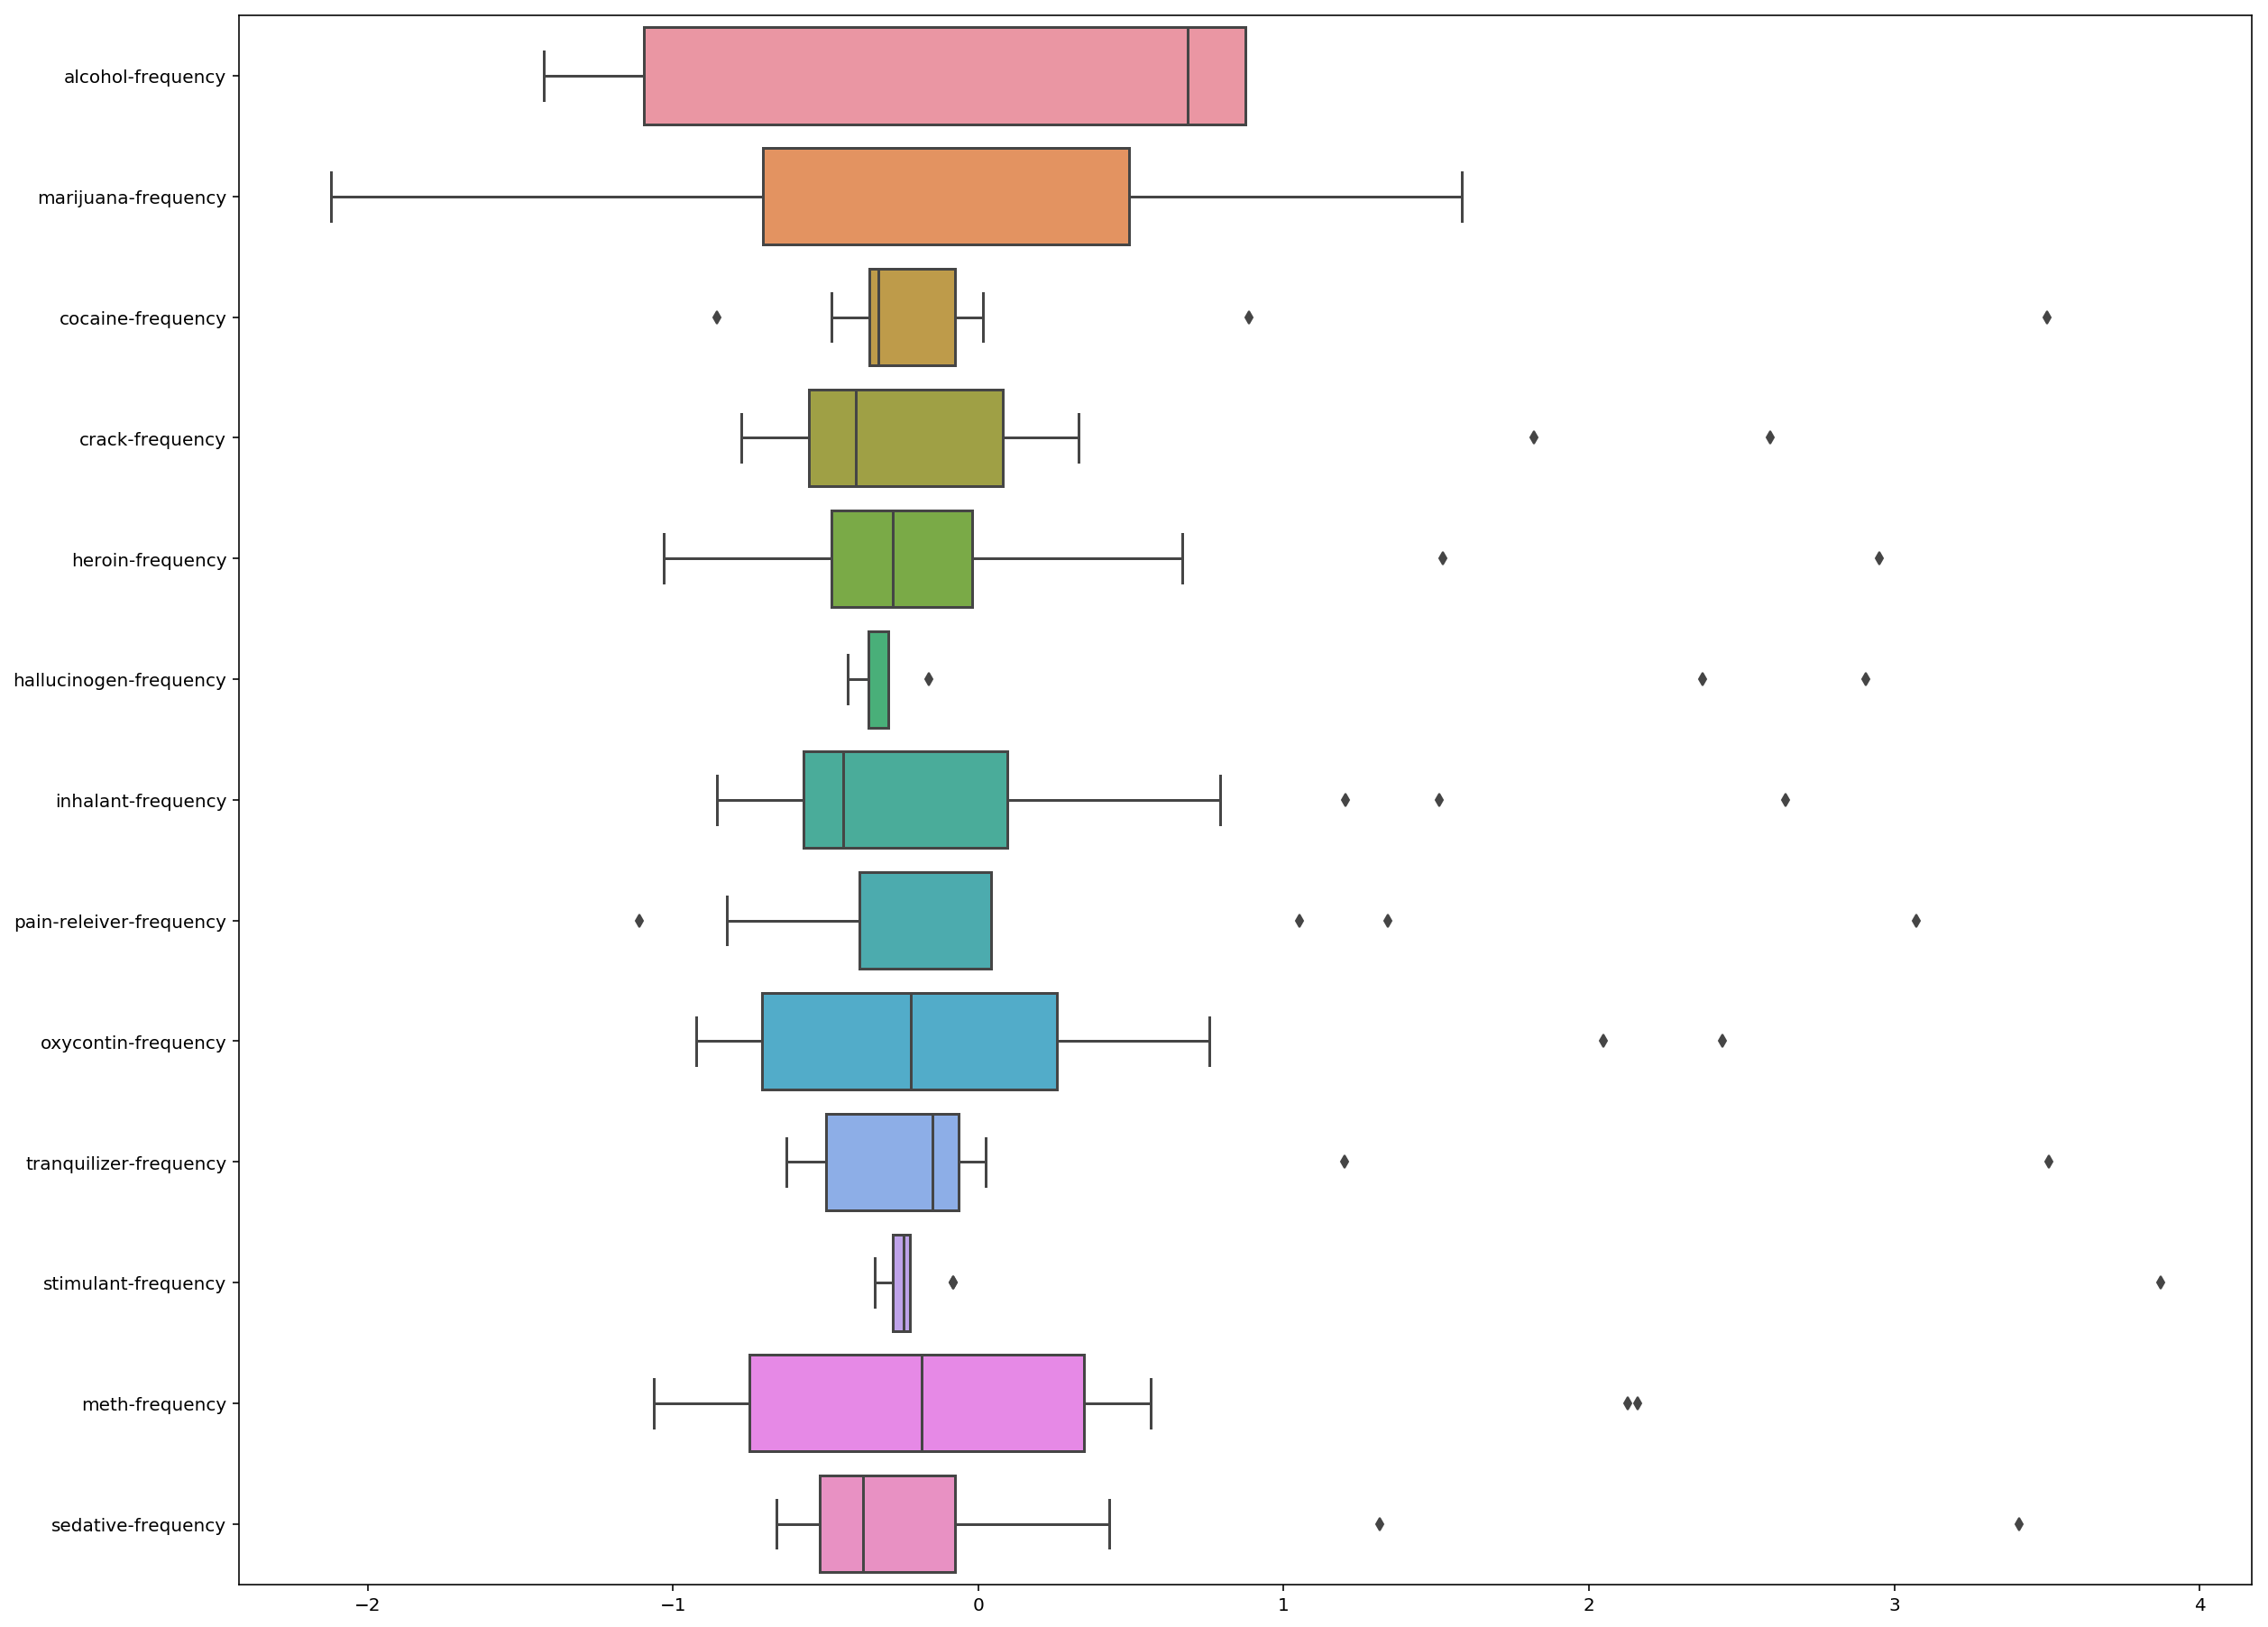

In [157]:
plt.figure(figsize = (20,16))
sns.boxplot(data = norm_freq, orient ='h')

In [112]:
#ALL BELOW THIS IS WRONG :C
drug_corr = data.corr()

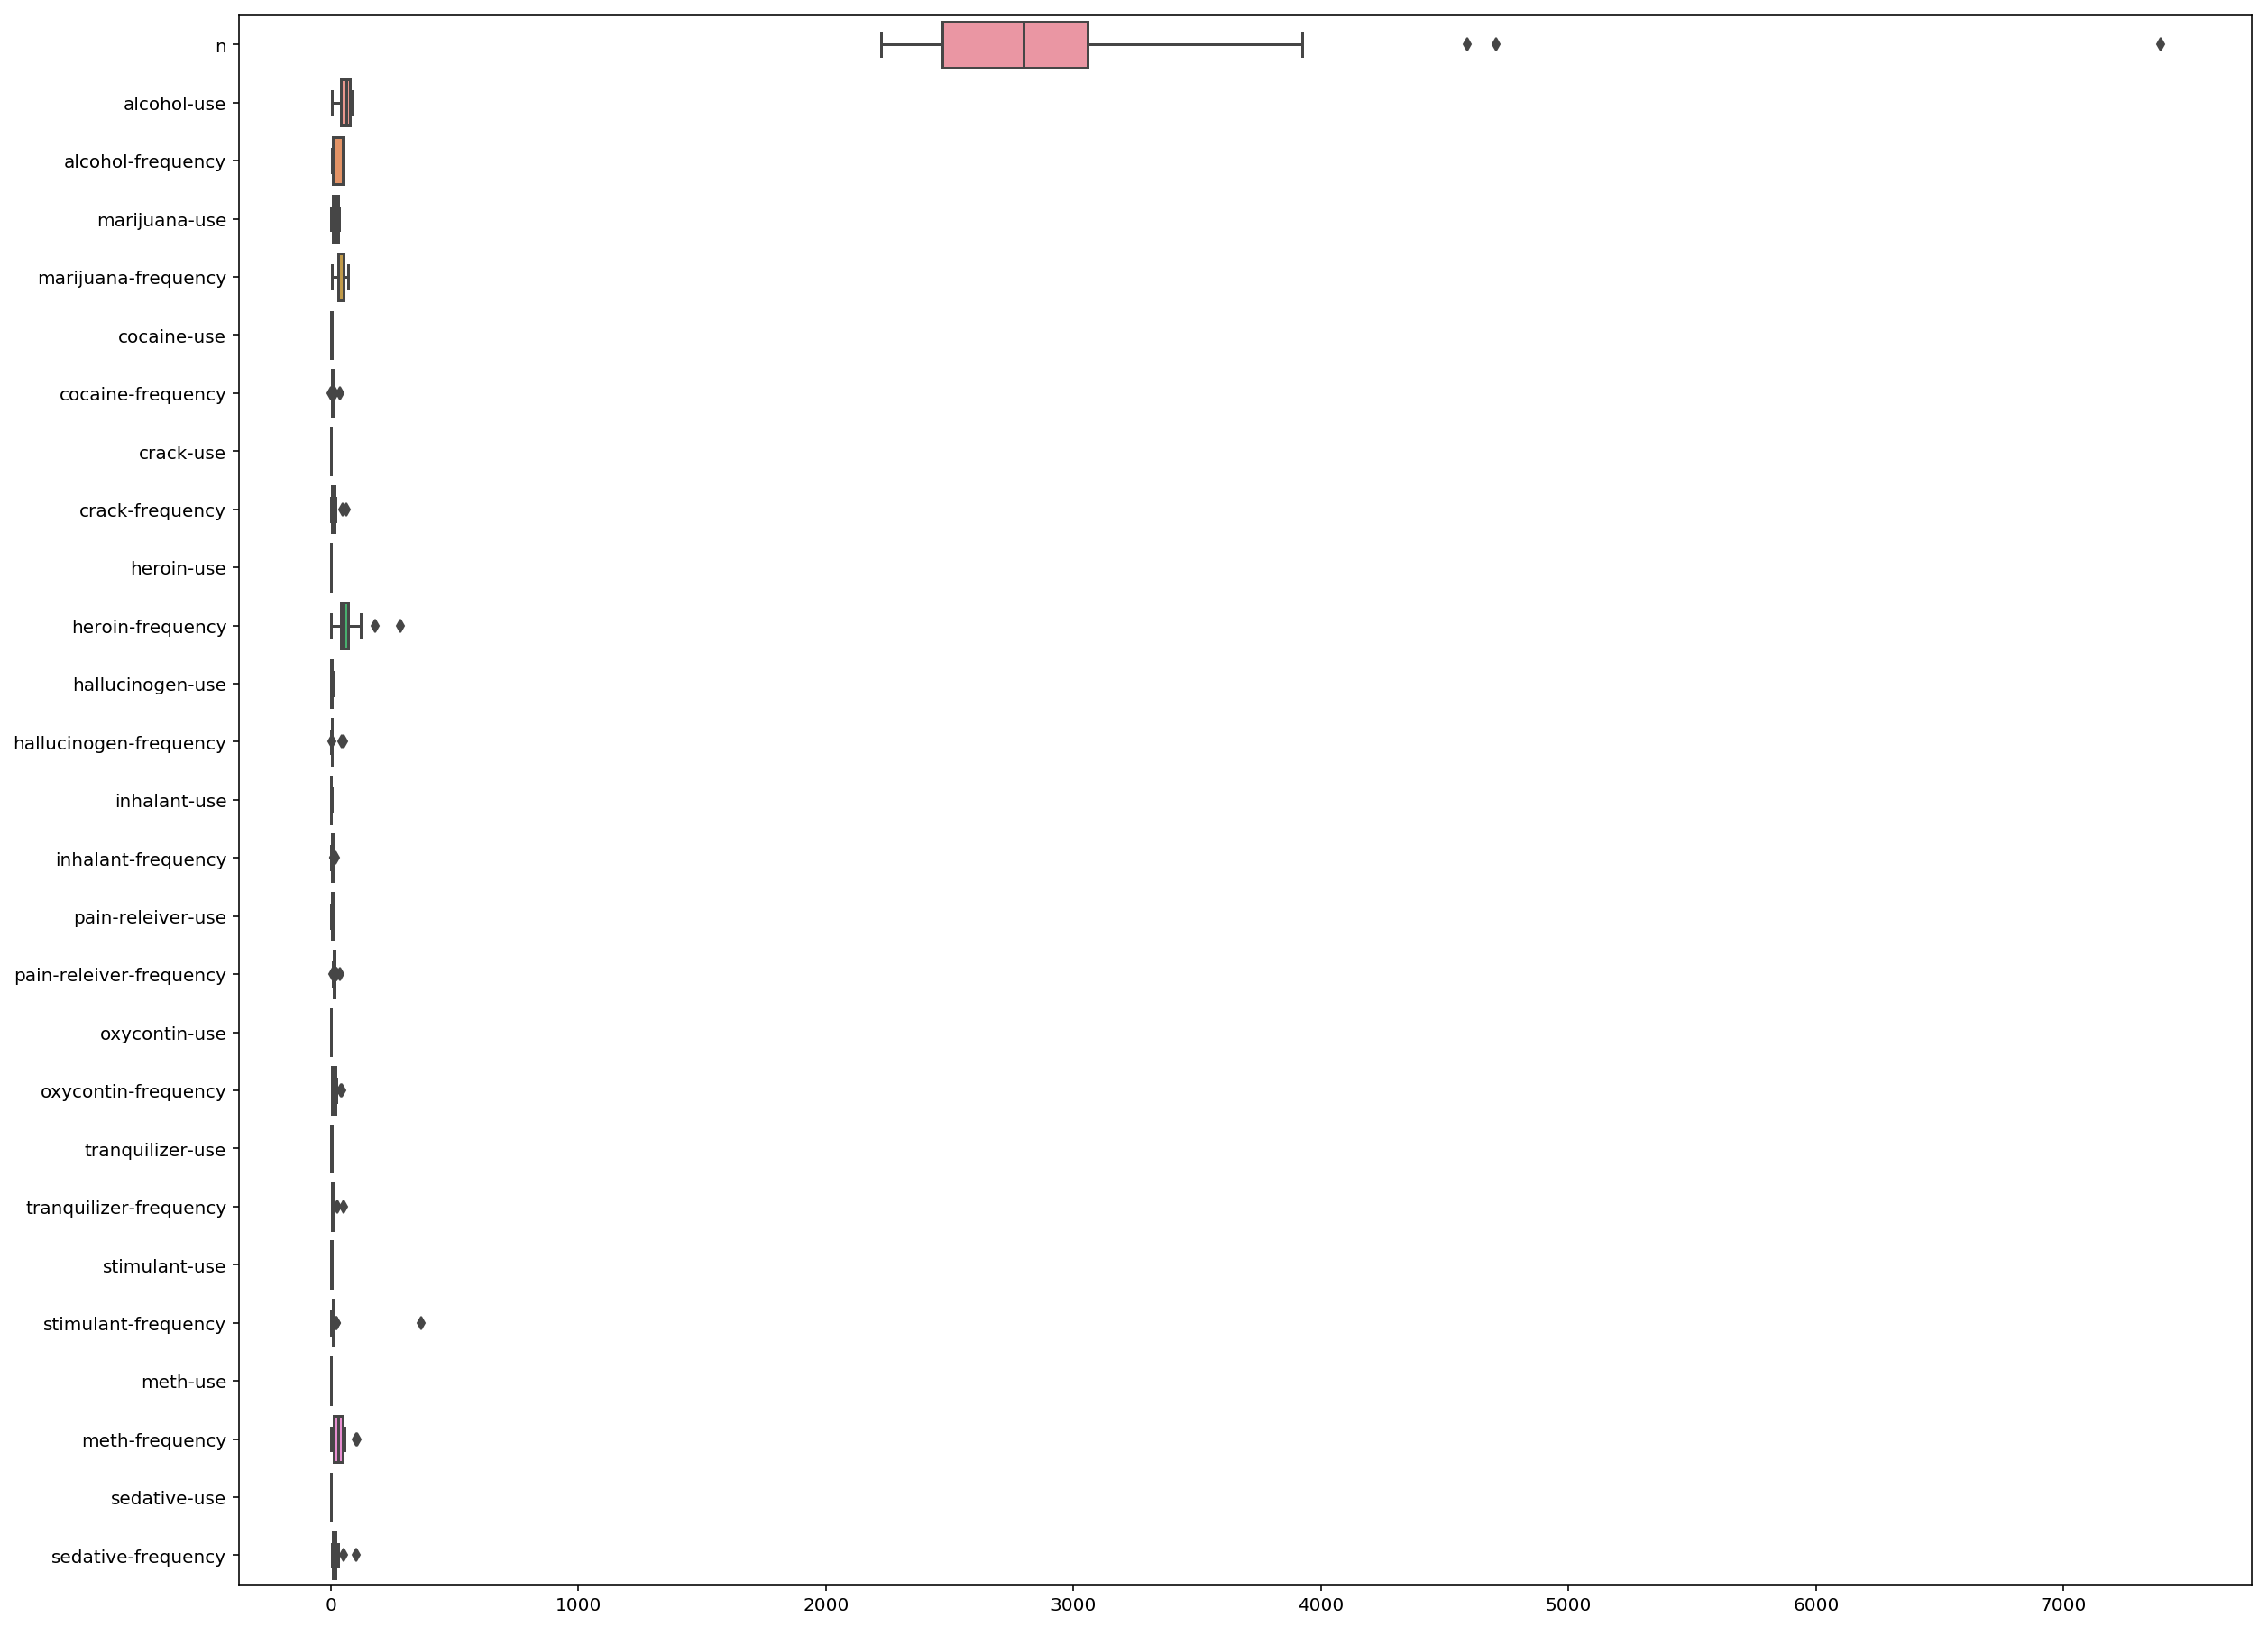

In [133]:
plt.figure(figsize=(20,16))
sns.boxplot(data = data, orient ='h')

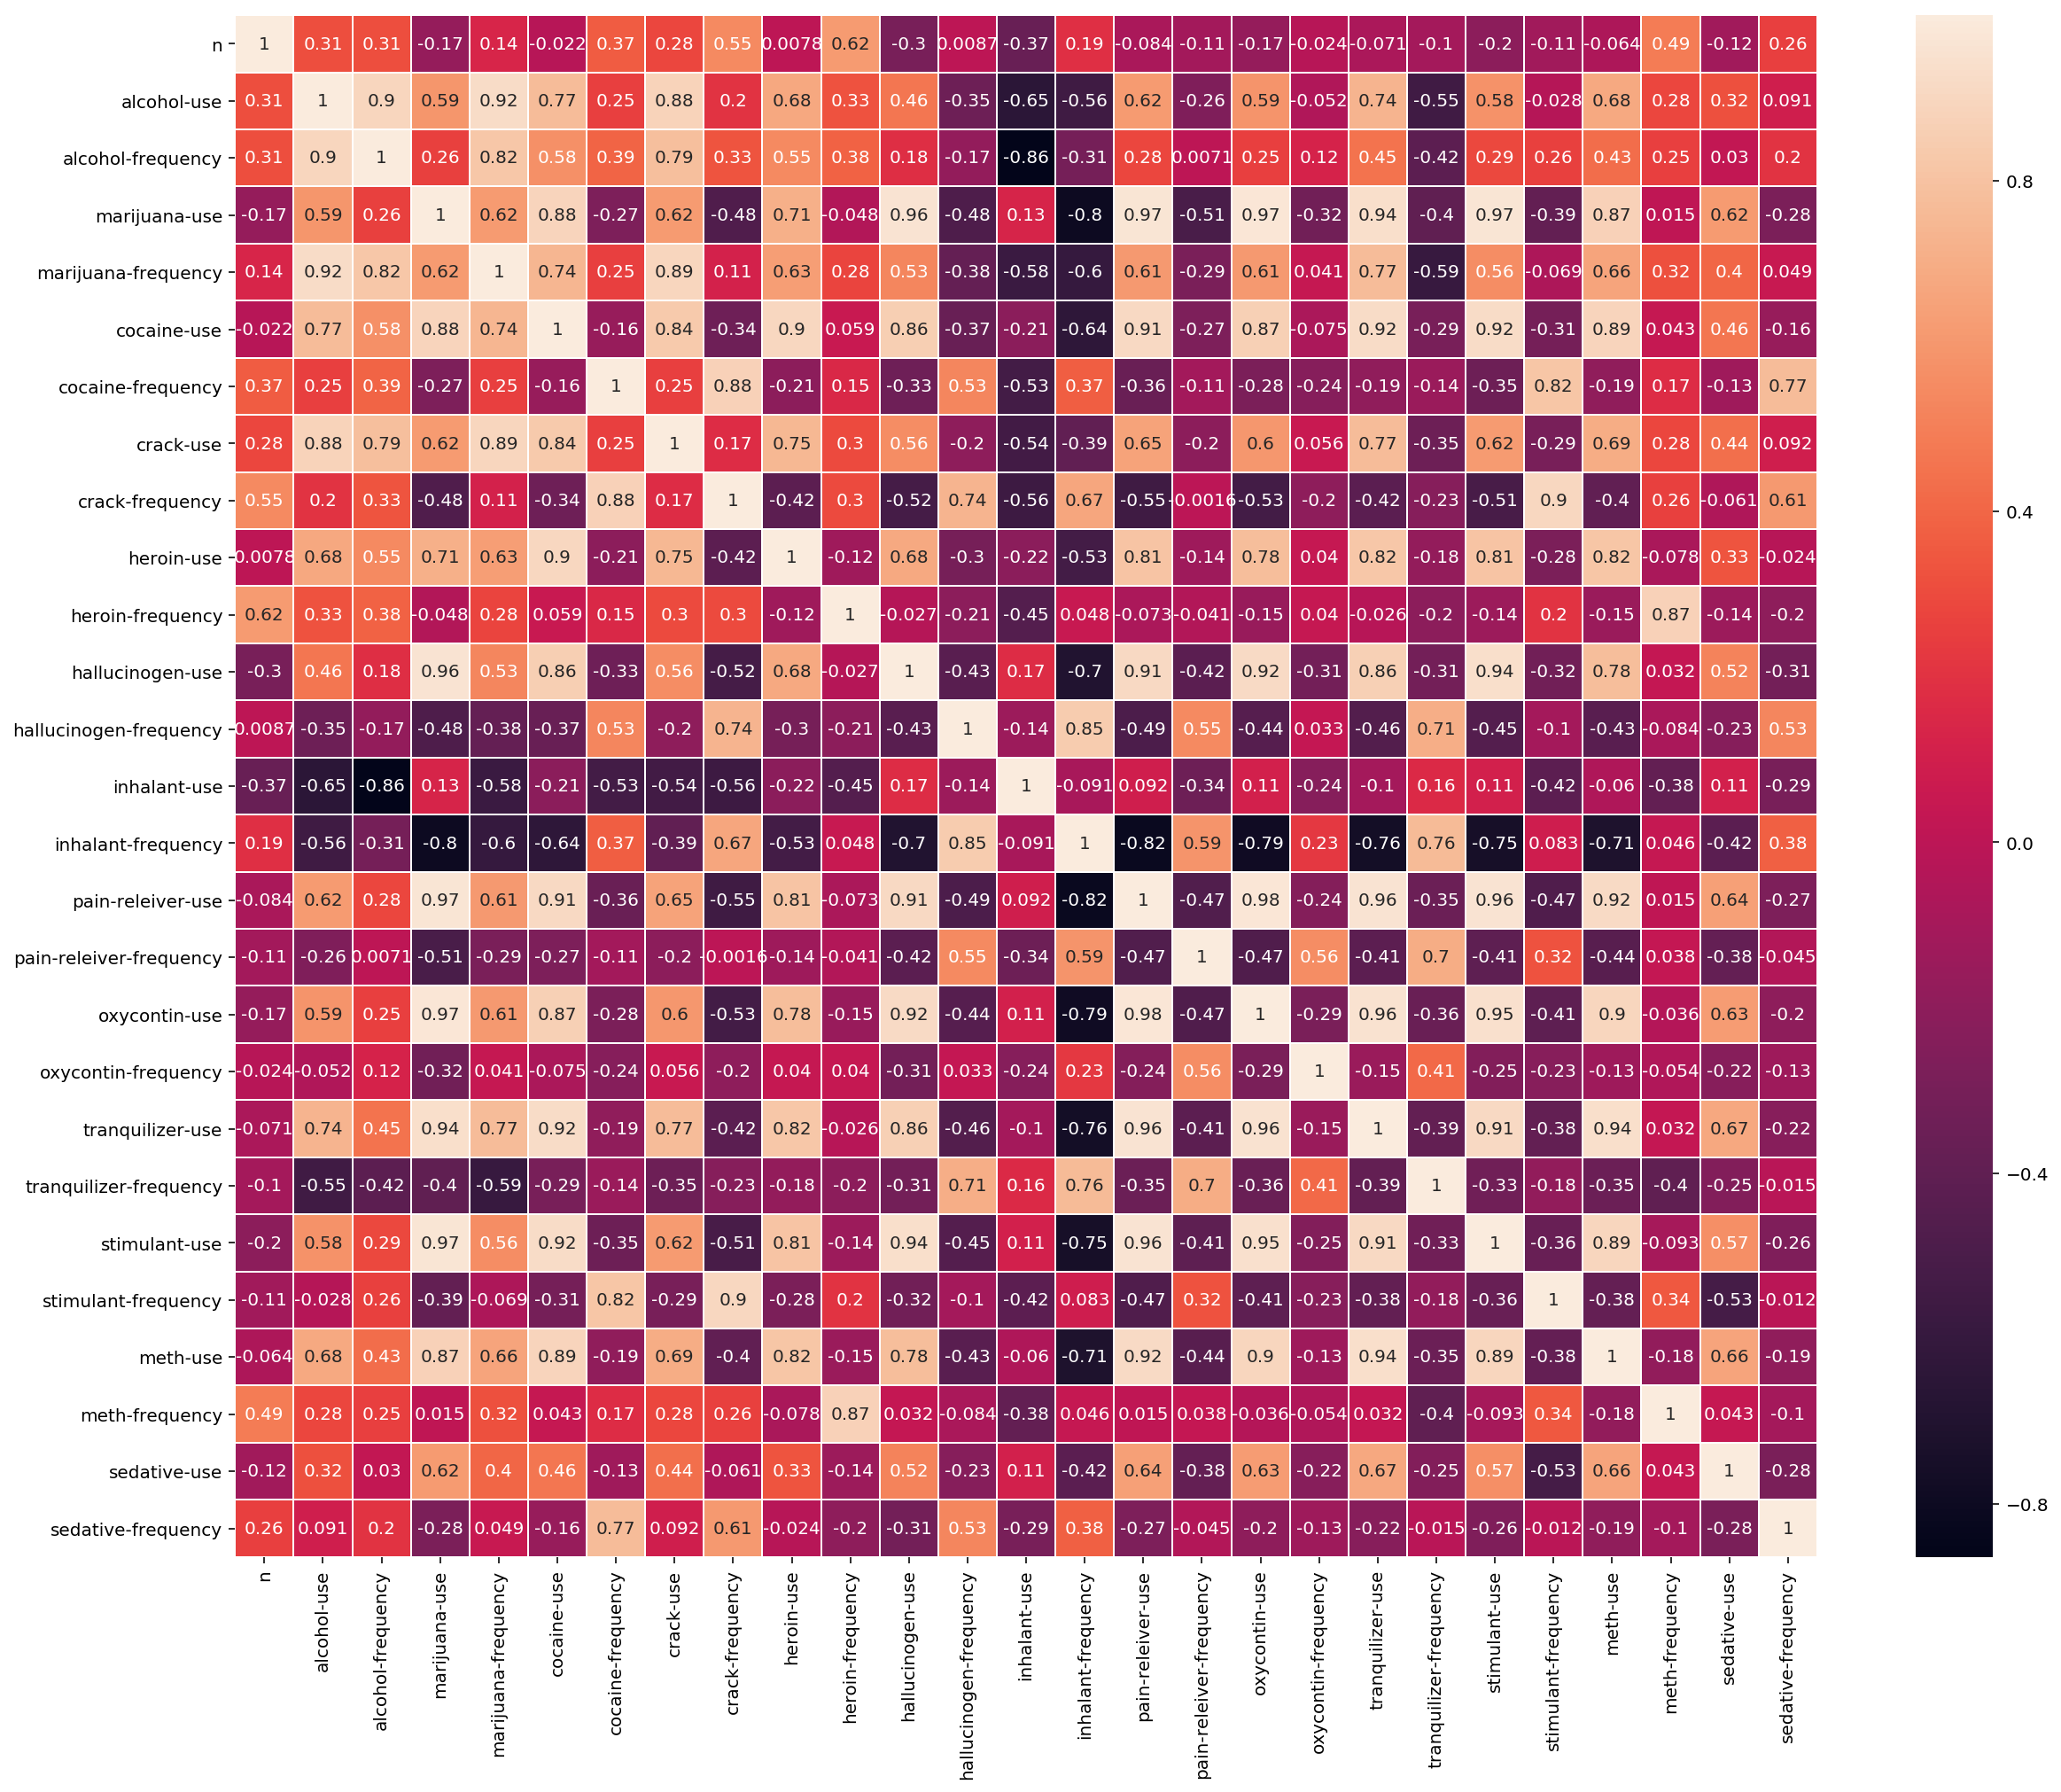

In [123]:
plt.figure(figsize=(20,16))    
ax = sns.heatmap(drug_corr, linewidth=0.5,  annot=True)

# turn the axis label
for y in ax.get_yticklabels():
    y.set_rotation(0)

for x in ax.get_xticklabels():
    x.set_rotation(90)
    


** There is strong correlation between 
1) marijuana and stimulant,
2) pain reliever and stimulant, 
3) tranquiliser and pain reliver + oxycontin, 
4) oxytoncin and marijuana + pain reliever, 
5) pain reliver and tranquiliser + oxytoncin, 
6) marijuana and hallucinogen,  **

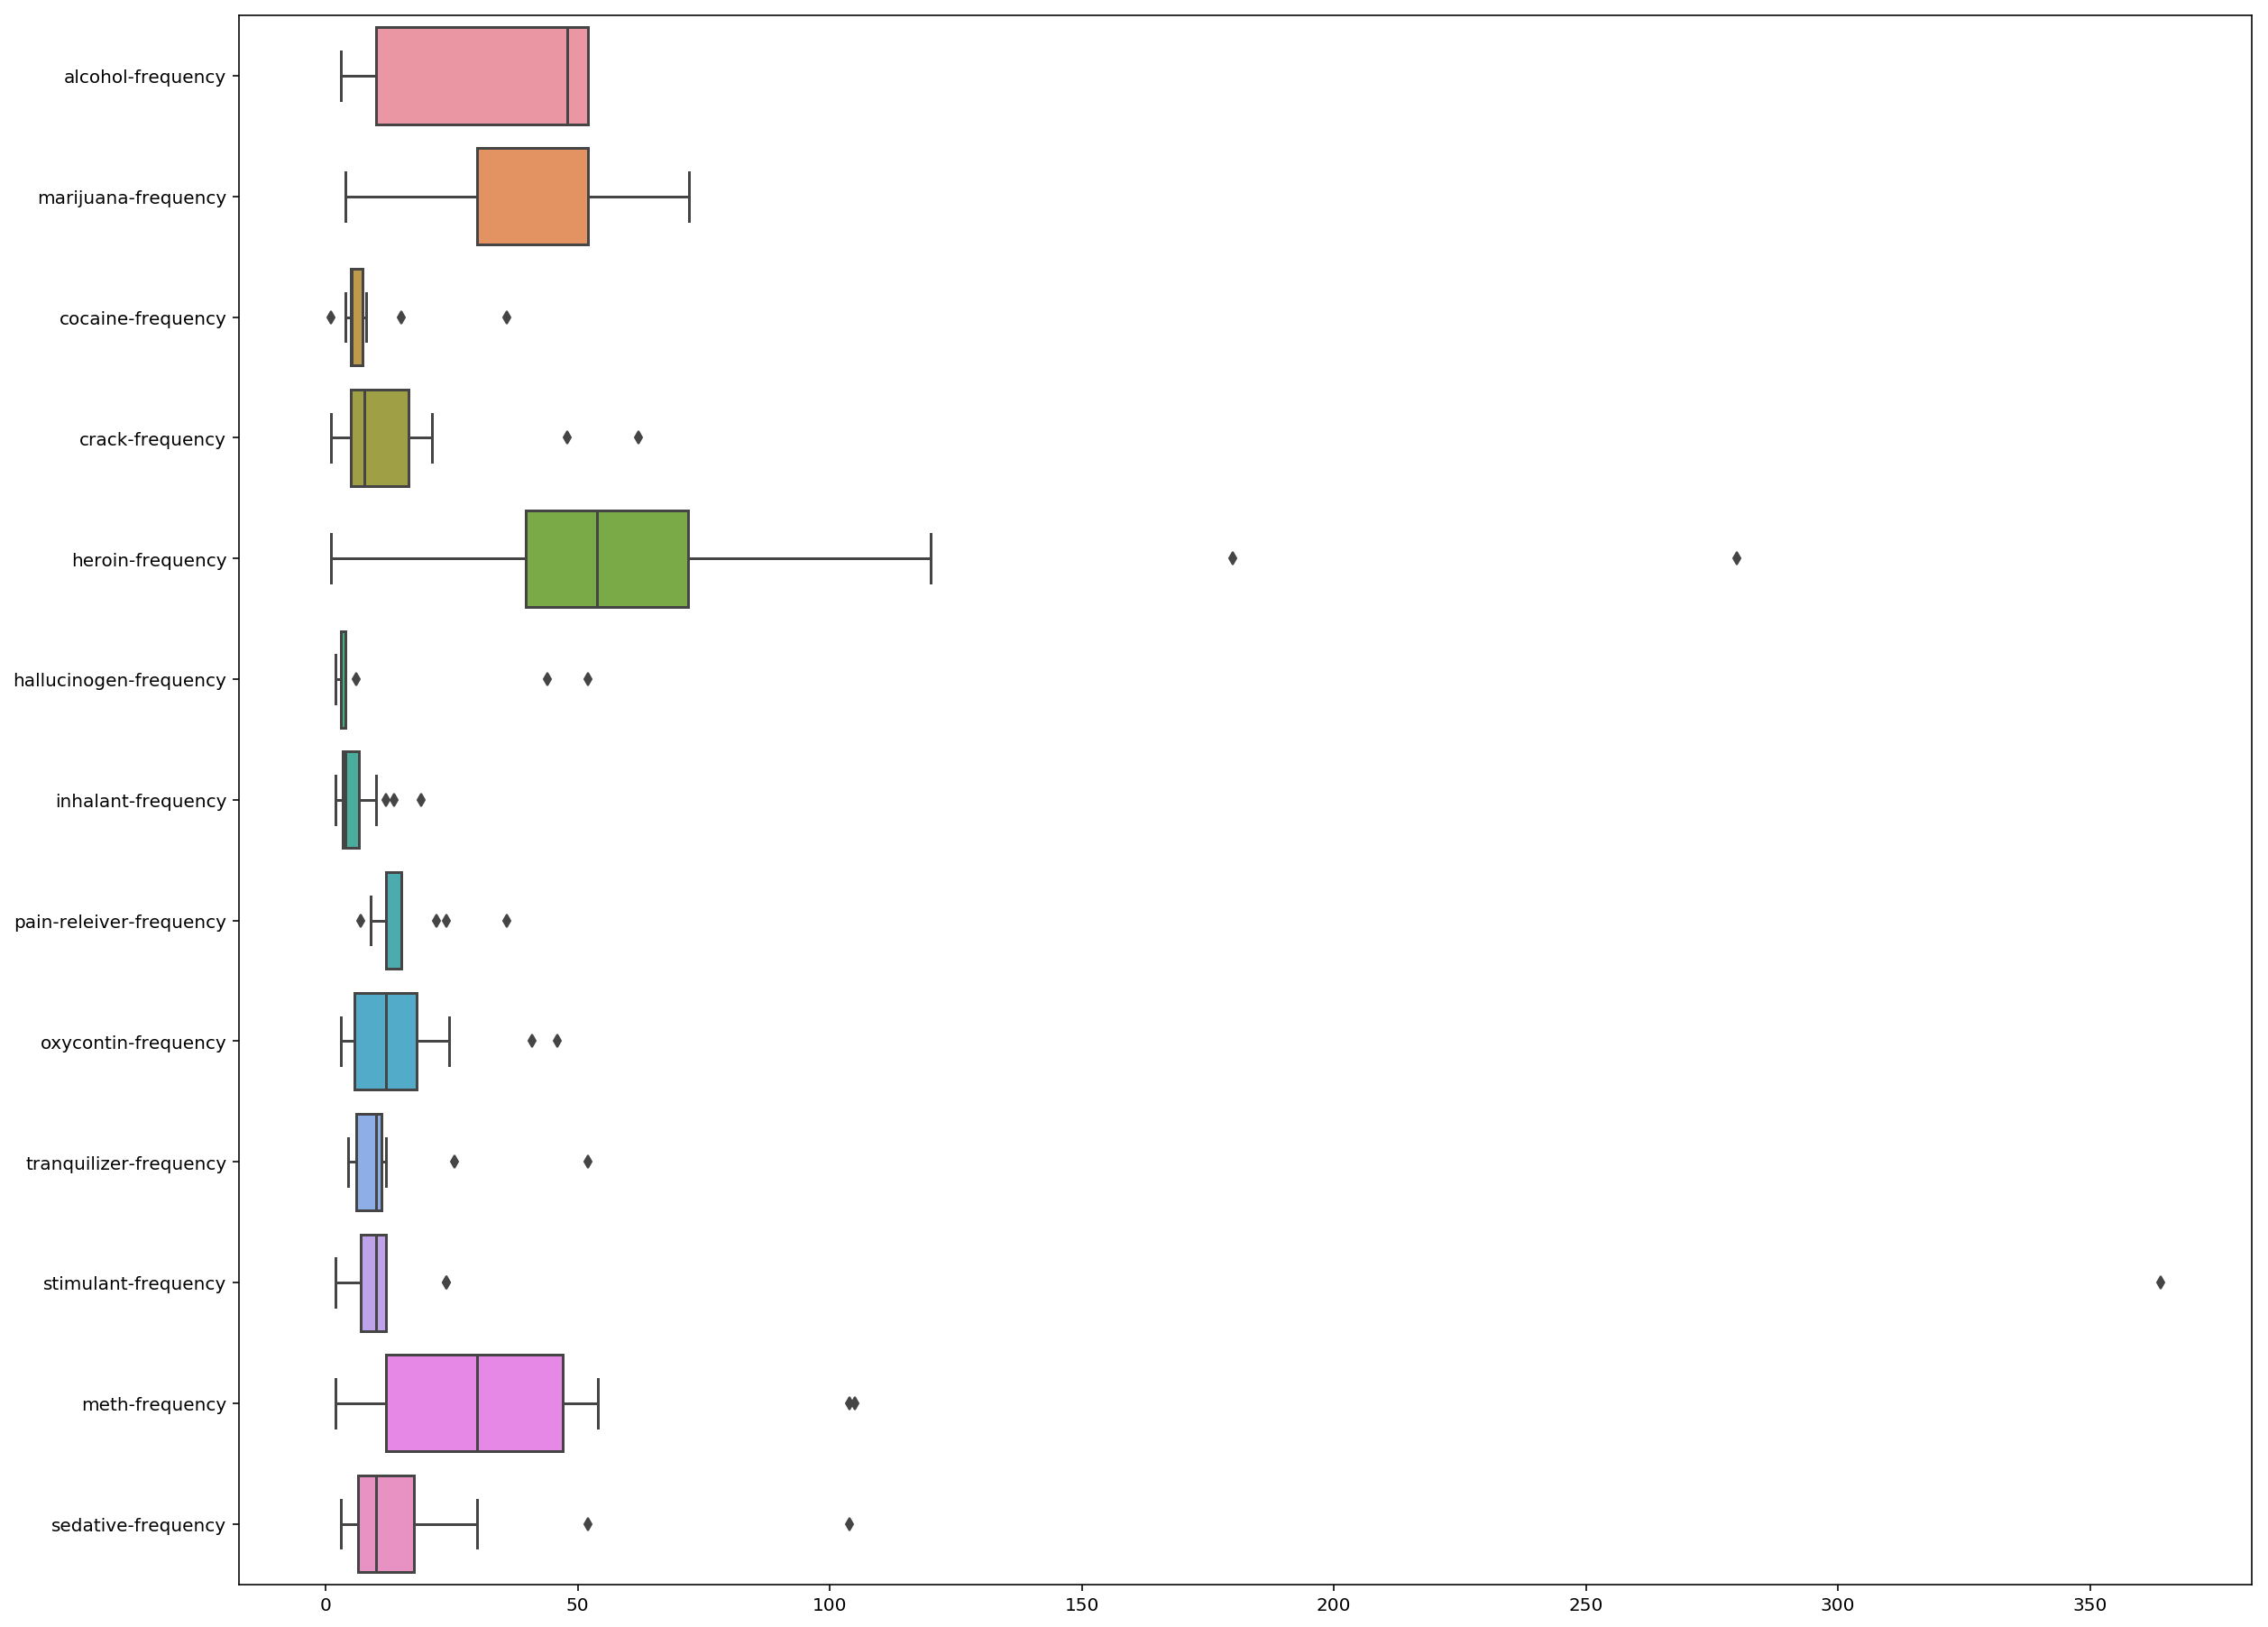

In [156]:
plt.figure(figsize = (20,16))
sns.boxplot(data = drugs_freq, orient ='h')

In [128]:
norm = (data - data.mean())/data.std()
norm.head()


,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,-0.349073,-1.917098,-1.423762,-1.490293,-2.120683,-1.142945,-0.357656,-1.247469,NaN,-0.757849,...,-1.373352,0.756938,-1.486206,3.505789,-1.220203,-0.339023,-1.455128,NaN,-0.596759,-0.257006
1,-0.380663,-1.745959,-1.283041,-1.297981,-1.521638,-1.142945,-0.855264,-1.247469,-0.664543,-1.057464,...,-1.373352,2.046174,-1.429173,1.198473,-1.149164,-0.315760,-1.074556,-0.968478,-1.321394,-0.015397
2,-0.353696,-1.388802,-1.329948,-0.854828,-1.031510,-1.142945,-0.295455,-1.247469,NaN,-0.757849,...,-0.880106,-0.805773,-1.086977,-0.586432,-0.793968,-0.222708,-1.074556,-0.374256,-0.596759,-0.116067
3,-0.227337,-0.975838,-1.283041,-0.369868,-0.977052,-0.922774,-0.482058,-0.823329,-0.305650,-0.458234,...,-0.222444,-0.922976,-0.459617,-0.629966,-0.296693,-0.292497,-0.313412,-0.796466,0.852512,0.427553
4,-0.148748,-0.570315,-1.095414,0.299042,-0.704759,-0.647561,-0.108852,-1.247469,-0.774972,-0.757849,...,0.270802,-0.844840,-0.231486,-0.064021,-0.083576,-0.251787,-0.313412,0.001042,-0.596759,-0.659687


In [129]:
norm.corr()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
n,1.000000,0.310512,0.313431,-0.169007,0.135597,-0.021565,0.365386,0.281797,0.548114,0.007798,...,-0.166039,-0.024438,-0.071086,-0.102301,-0.201621,-0.114792,-0.063571,0.485909,-0.119997,0.256701
alcohol-use,0.310512,1.000000,0.897889,0.594165,0.920425,0.773458,0.254042,0.877378,0.202732,0.677614,...,0.589219,-0.052126,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.282820,0.318268,0.091251
alcohol-frequency,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.391981,0.785050,0.333935,0.546194,...,0.251554,0.119852,0.448543,-0.415026,0.291766,0.260304,0.425153,0.253725,0.029867,0.201423
marijuana-use,-0.169007,0.594165,0.260219,1.000000,0.615610,0.883789,-0.273950,0.620670,-0.476095,0.711613,...,0.971733,-0.323519,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.014585,0.616766,-0.277144
marijuana-frequency,0.135597,0.920425,0.818769,0.615610,1.000000,0.742598,0.250348,0.892077,0.113860,0.631789,...,0.609618,0.040880,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.317099,0.399124,0.048777
cocaine-use,-0.021565,0.773458,0.577601,0.883789,0.742598,1.000000,-0.163922,0.835727,-0.339153,0.899944,...,0.865626,-0.075193,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.043154,0.461914,-0.159997
cocaine-frequency,0.365386,0.254042,0.391981,-0.273950,0.250348,-0.163922,1.000000,0.250877,0.875558,-0.206298,...,-0.276995,-0.236768,-0.191929,-0.144951,-0.345279,0.817772,-0.189141,0.172758,-0.126690,0.773808
crack-use,0.281797,0.877378,0.785050,0.620670,0.892077,0.835727,0.250877,1.000000,0.173208,0.750790,...,0.603003,0.056195,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.281240,0.438421,0.091676
crack-frequency,0.548114,0.202732,0.333935,-0.476095,0.113860,-0.339153,0.875558,0.173208,1.000000,-0.417148,...,-0.529659,-0.195650,-0.420309,-0.233501,-0.511014,0.903993,-0.395273,0.261224,-0.060603,0.611218
heroin-use,0.007798,0.677614,0.546194,0.711613,0.631789,0.899944,-0.206298,0.750790,-0.417148,1.000000,...,0.775321,0.039657,0.818583,-0.175464,0.808024,-0.277996,0.816620,-0.078088,0.333649,-0.023708


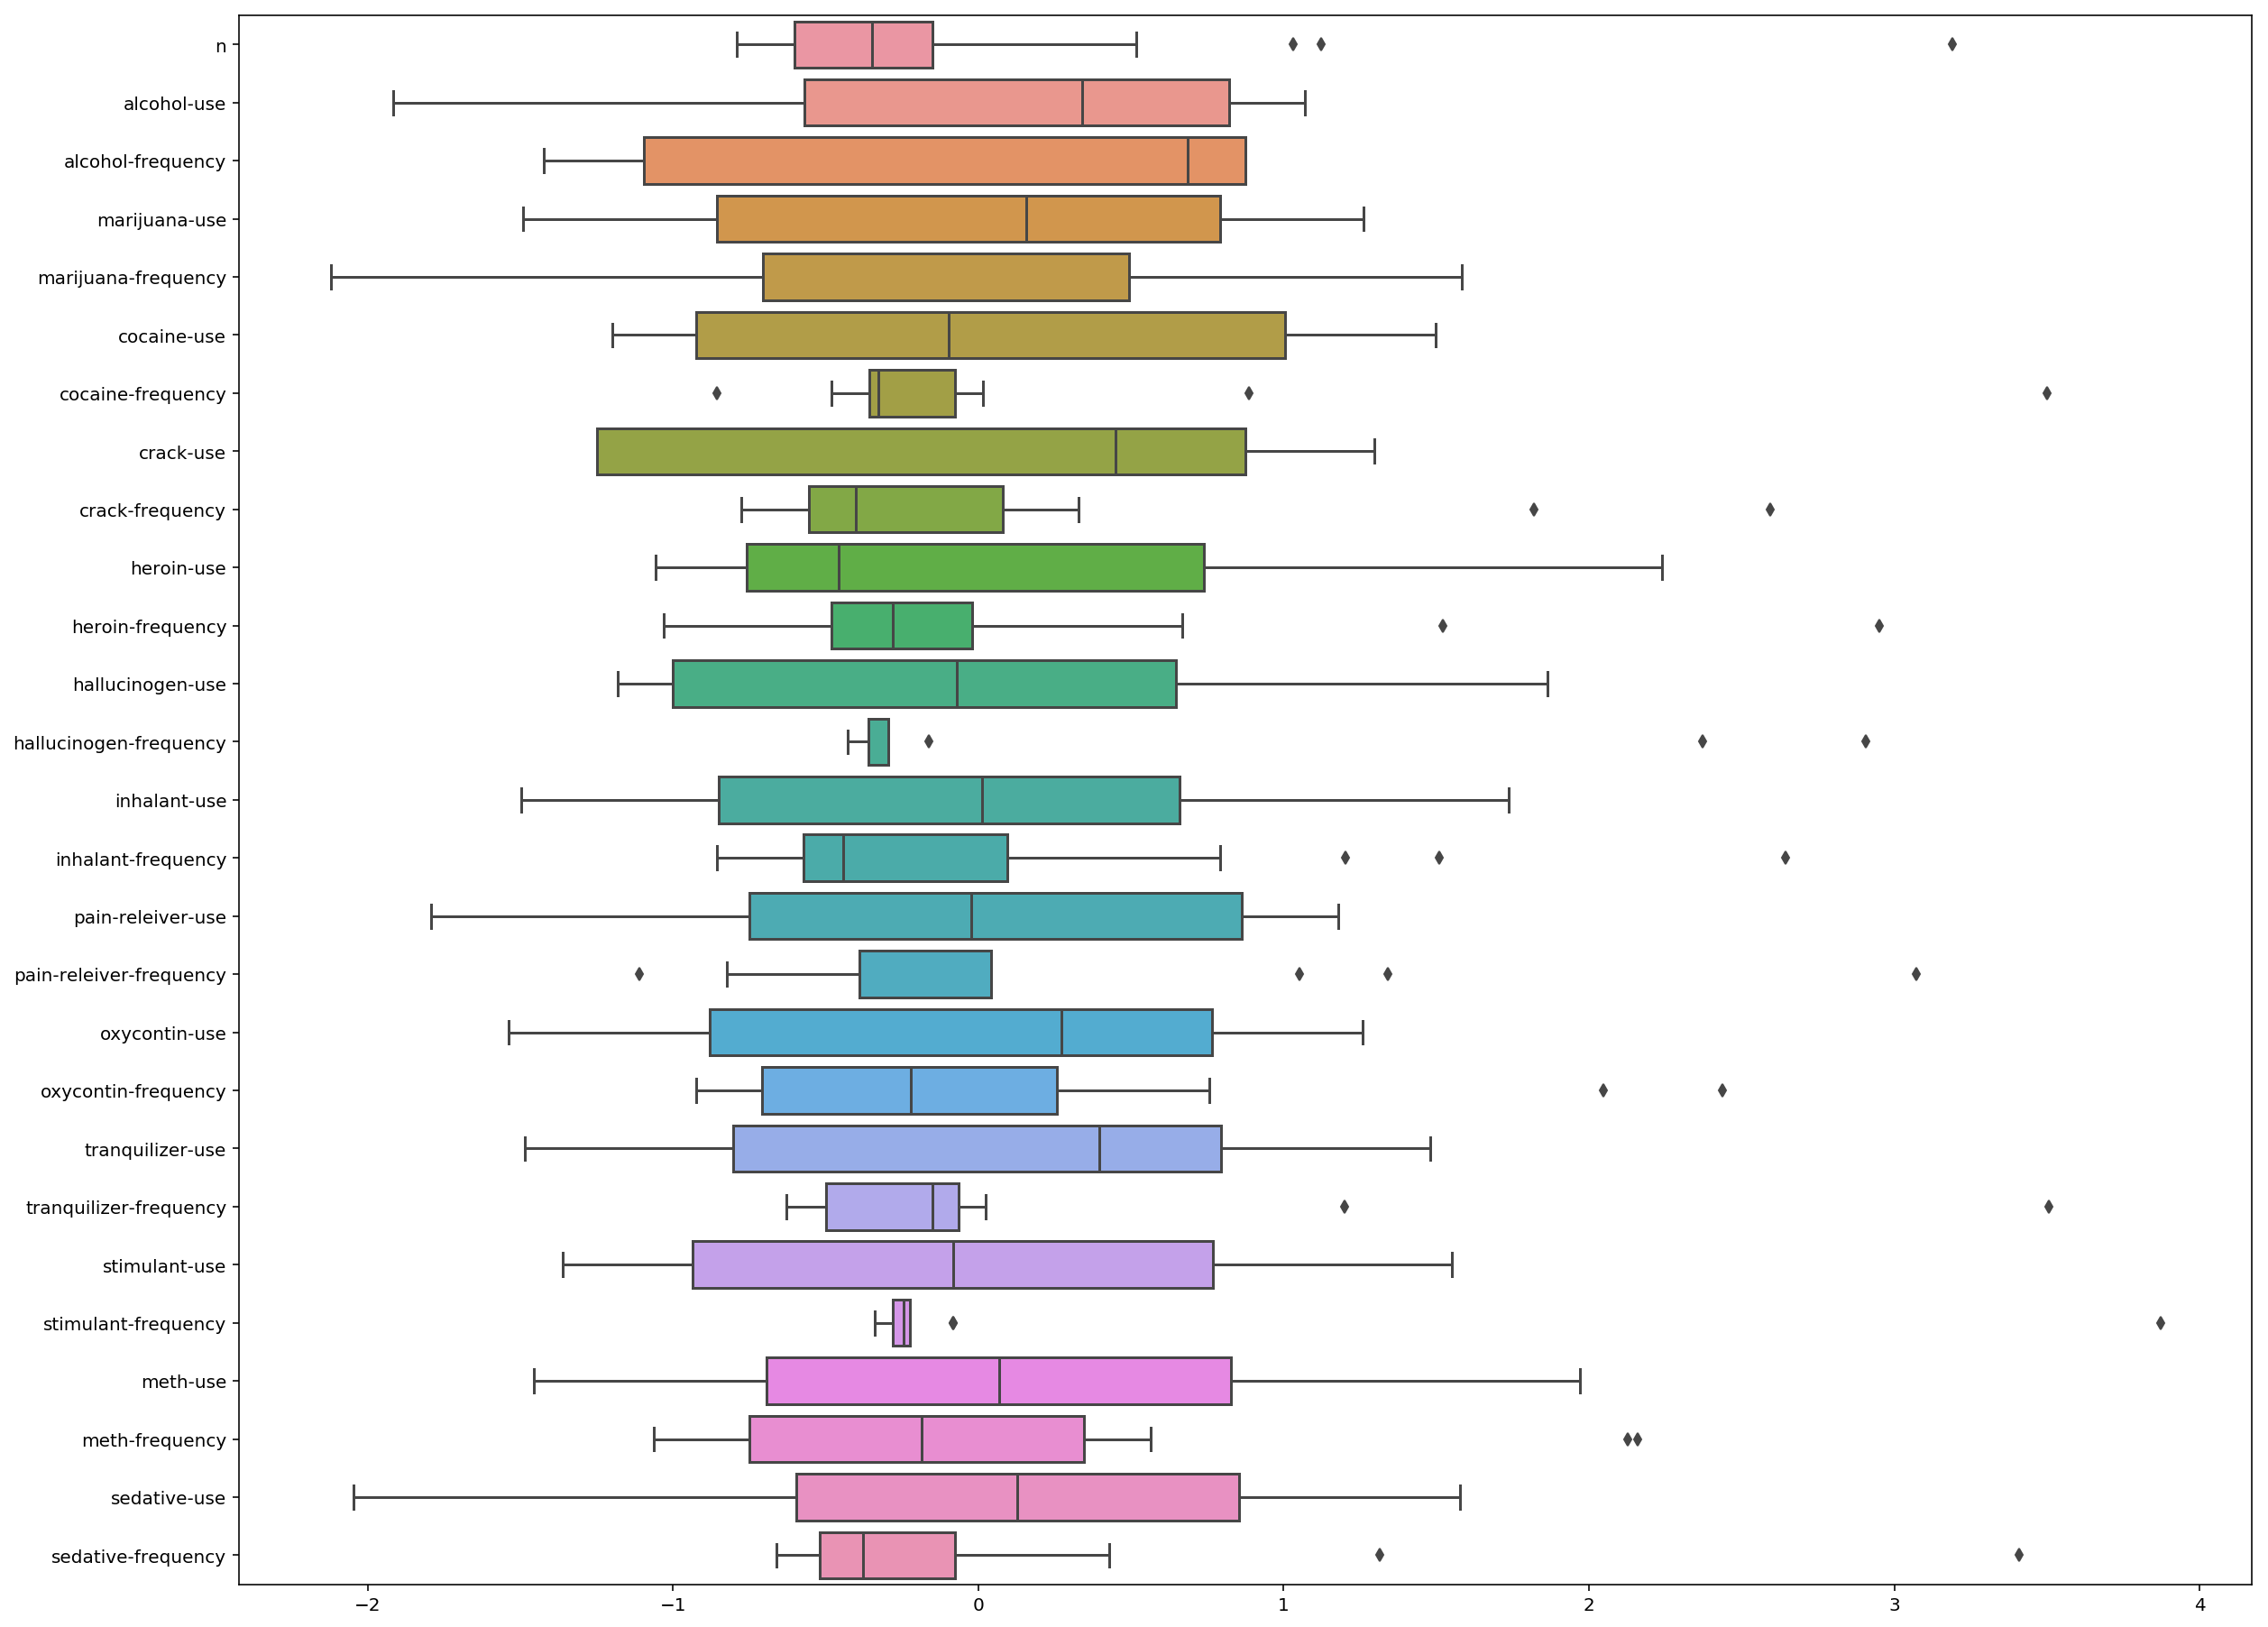

In [131]:
plt.figure(figsize = (20,16))
sns.boxplot(data = norm, orient ='h')

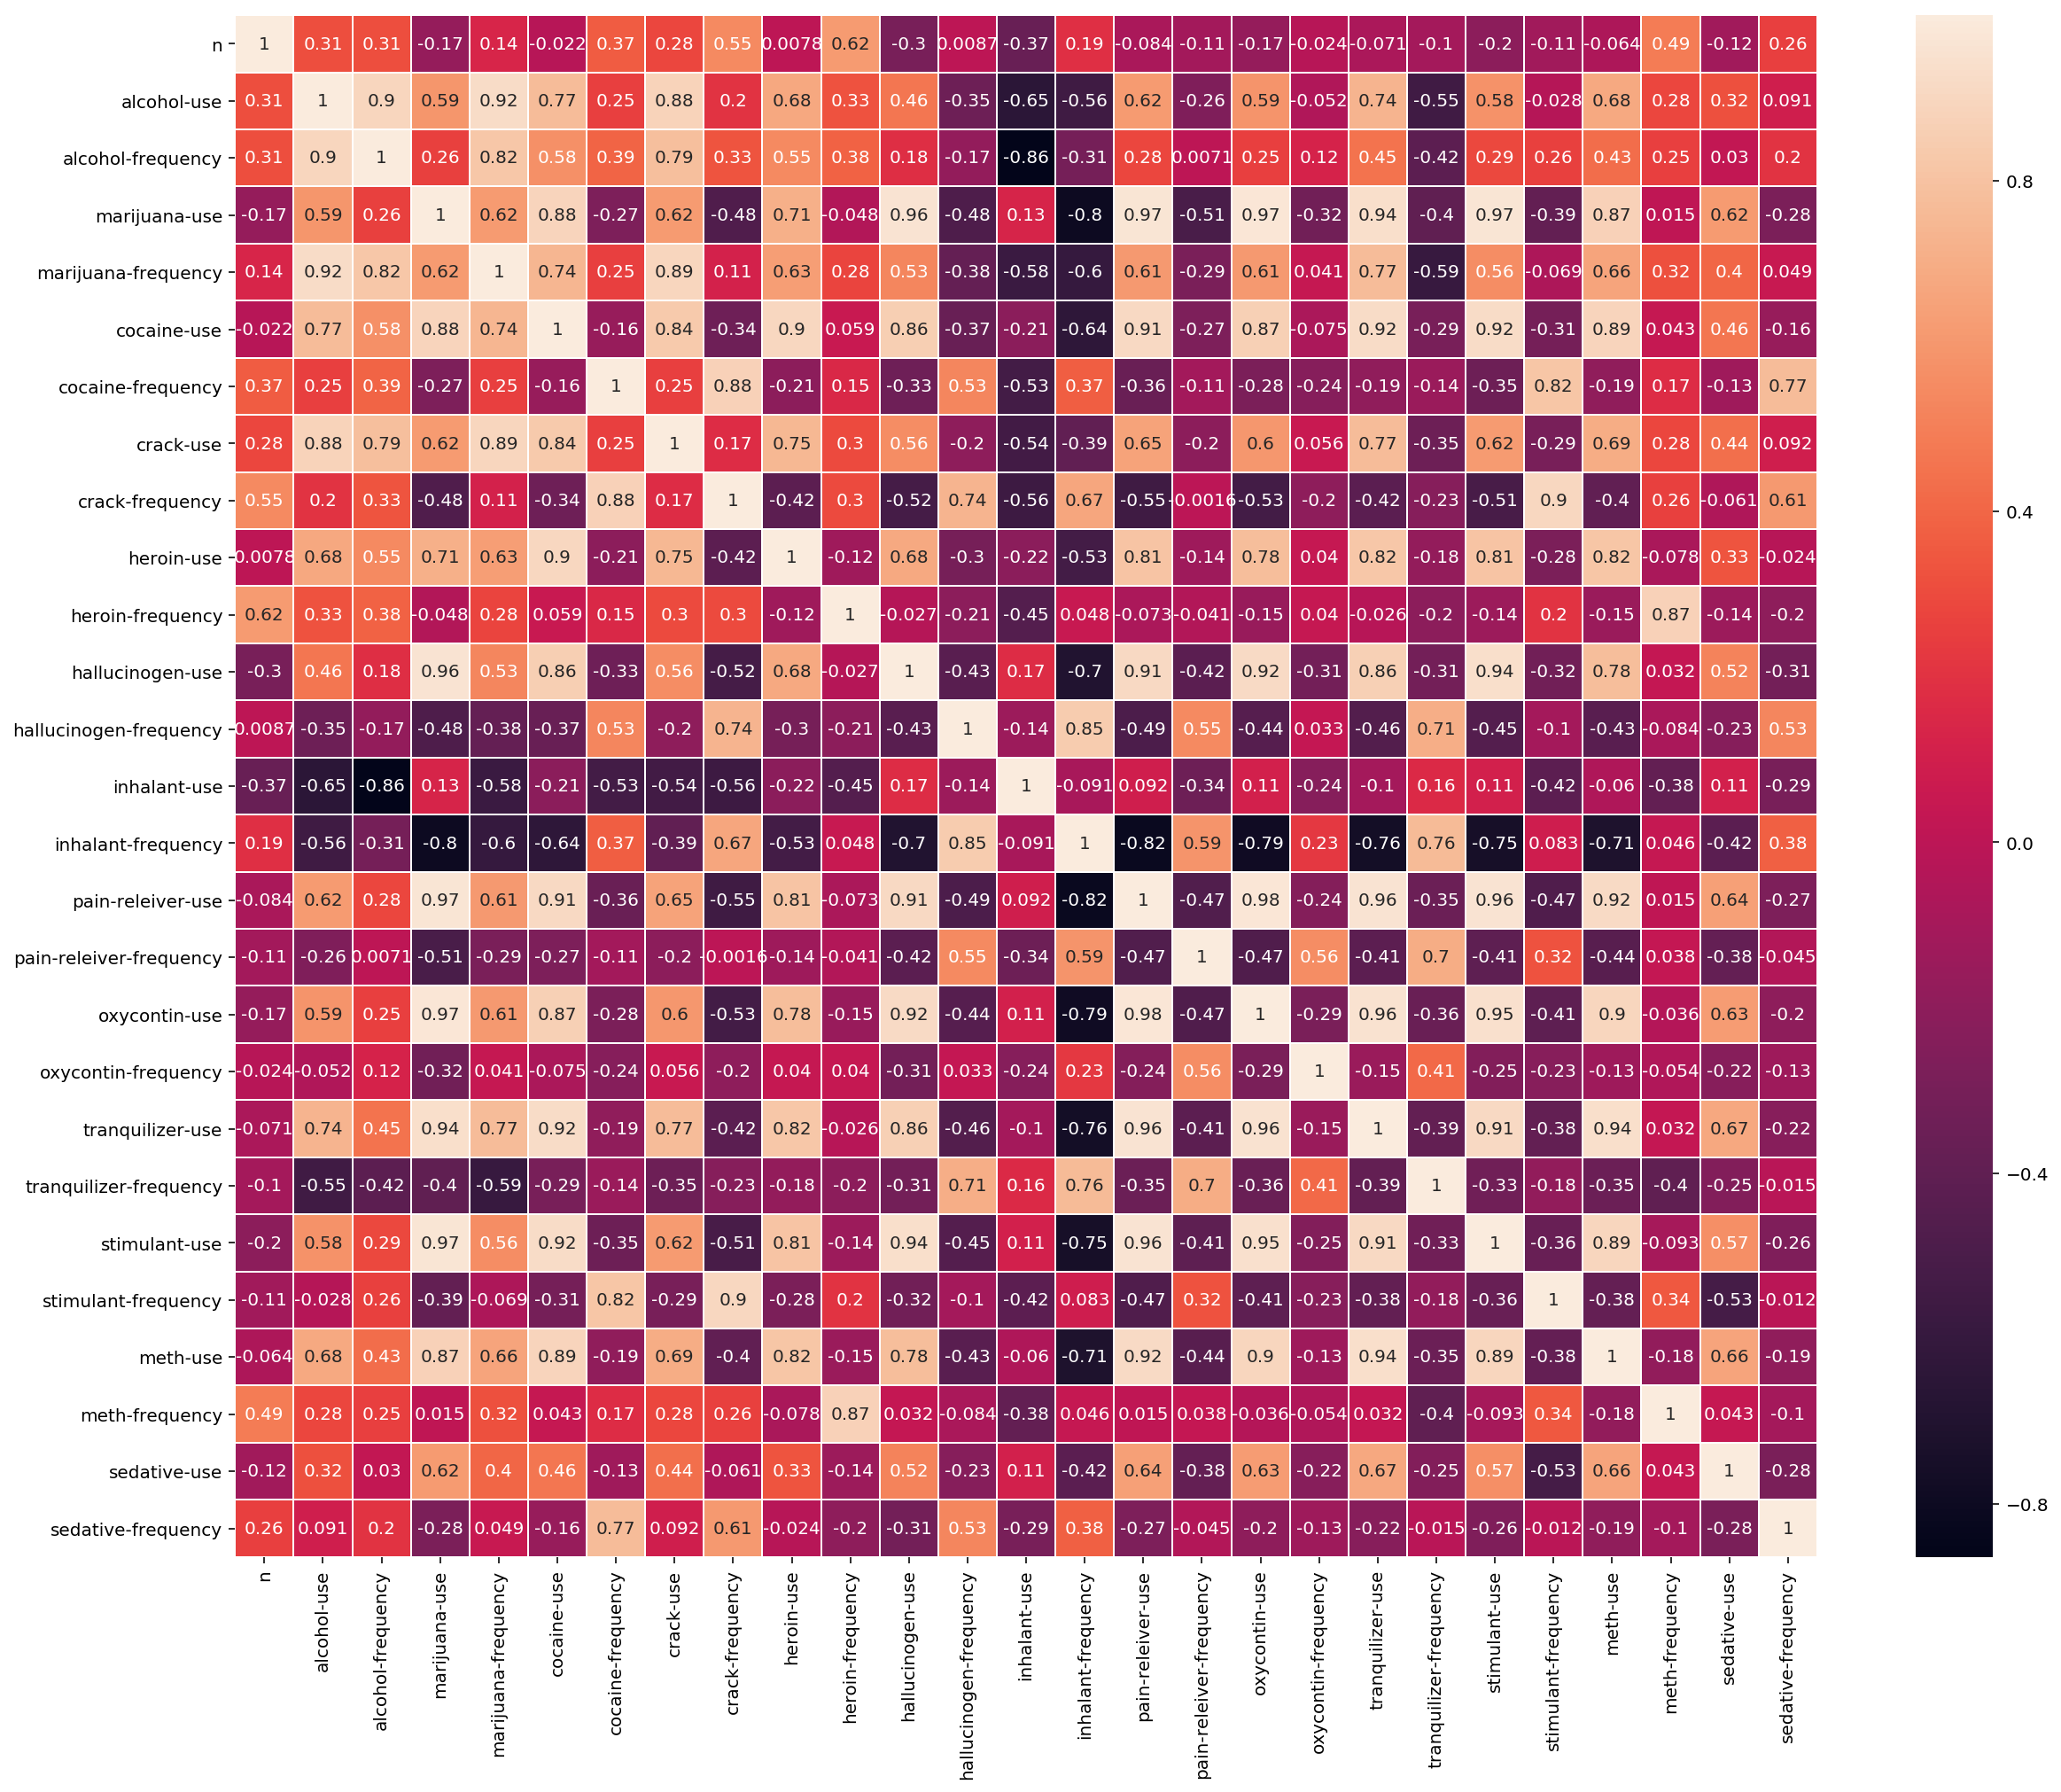

In [132]:
norm_corr = norm.corr()
plt.figure(figsize=(20,16))    
ax = sns.heatmap(norm_corr, linewidth=0.5,  annot=True)

# turn the axis label
for y in ax.get_yticklabels():
    y.set_rotation(0)

for x in ax.get_xticklabels():
    x.set_rotation(90)
    


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [158]:
def generate_group(mean, std, n):
    return np.random.normal(mean, std, size=n)

norm_usage

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,-1.917098,-1.490293,-1.142945,-1.247469,-0.757849,-1.143818,0.228371,-1.348729,-1.373352,-1.486206,-1.220203,-1.455128,-0.596759
1,-1.745959,-1.297981,-1.142945,-1.247469,-1.057464,-1.000577,1.198949,-1.222402,-1.373352,-1.429173,-1.149164,-1.074556,-1.321394
2,-1.388802,-0.854828,-1.142945,-1.247469,-0.757849,-0.642476,1.306791,-0.748675,-0.880106,-1.086977,-0.793968,-1.074556,-0.596759
3,-0.975838,-0.369868,-0.922774,-0.823329,-0.458234,-0.463425,1.198949,-0.243366,-0.222444,-0.459617,-0.296693,-0.313412,0.852512
4,-0.570315,0.299042,-0.647561,-1.247469,-0.757849,0.002106,1.738159,-0.022293,0.270802,-0.231486,-0.083576,-0.313412,-0.596759
5,-0.228038,0.758918,-0.097134,-0.823329,-0.757849,0.503448,0.659739,0.704089,0.764048,0.395874,0.626817,0.828303,1.577148
6,0.121679,1.235516,0.563378,0.449089,0.140995,1.291271,0.444055,0.925161,1.257294,1.194333,0.768895,0.447732,0.852512
7,0.341182,1.210432,1.058762,0.873228,0.440610,1.864233,0.012687,0.988325,0.928463,0.795103,0.982013,0.067160,0.127877
8,0.530922,1.260601,1.499103,1.297367,1.639069,1.434512,0.120529,1.177816,1.257294,1.479496,1.479287,1.970019,1.577148
9,1.033176,1.176987,1.444061,0.873228,0.740225,1.040600,0.012687,0.861998,0.599632,0.624005,1.550326,0.828303,0.127877


In [161]:
drugs_usage.describe()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


# H0: The difference between the cocaine and tranquiliser is 0.
# H1: The difference between the cocaine and tranquiliser is not 0.

In [167]:
cocaine = drugs_usage['cocaine-use']
tranq = drugs_usage['tranquilizer-use']


pandas.core.series.Series

In [170]:
mean_difference = np.mean(cocaine) - np.mean(tranq)
print mean_difference

-0.629411764706


In [171]:
import scipy.stats as stats
stats.ttest_ind(cocaine, tranq)

Ttest_indResult(statistic=-1.0278251077560792, pvalue=0.3117390040840304)

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

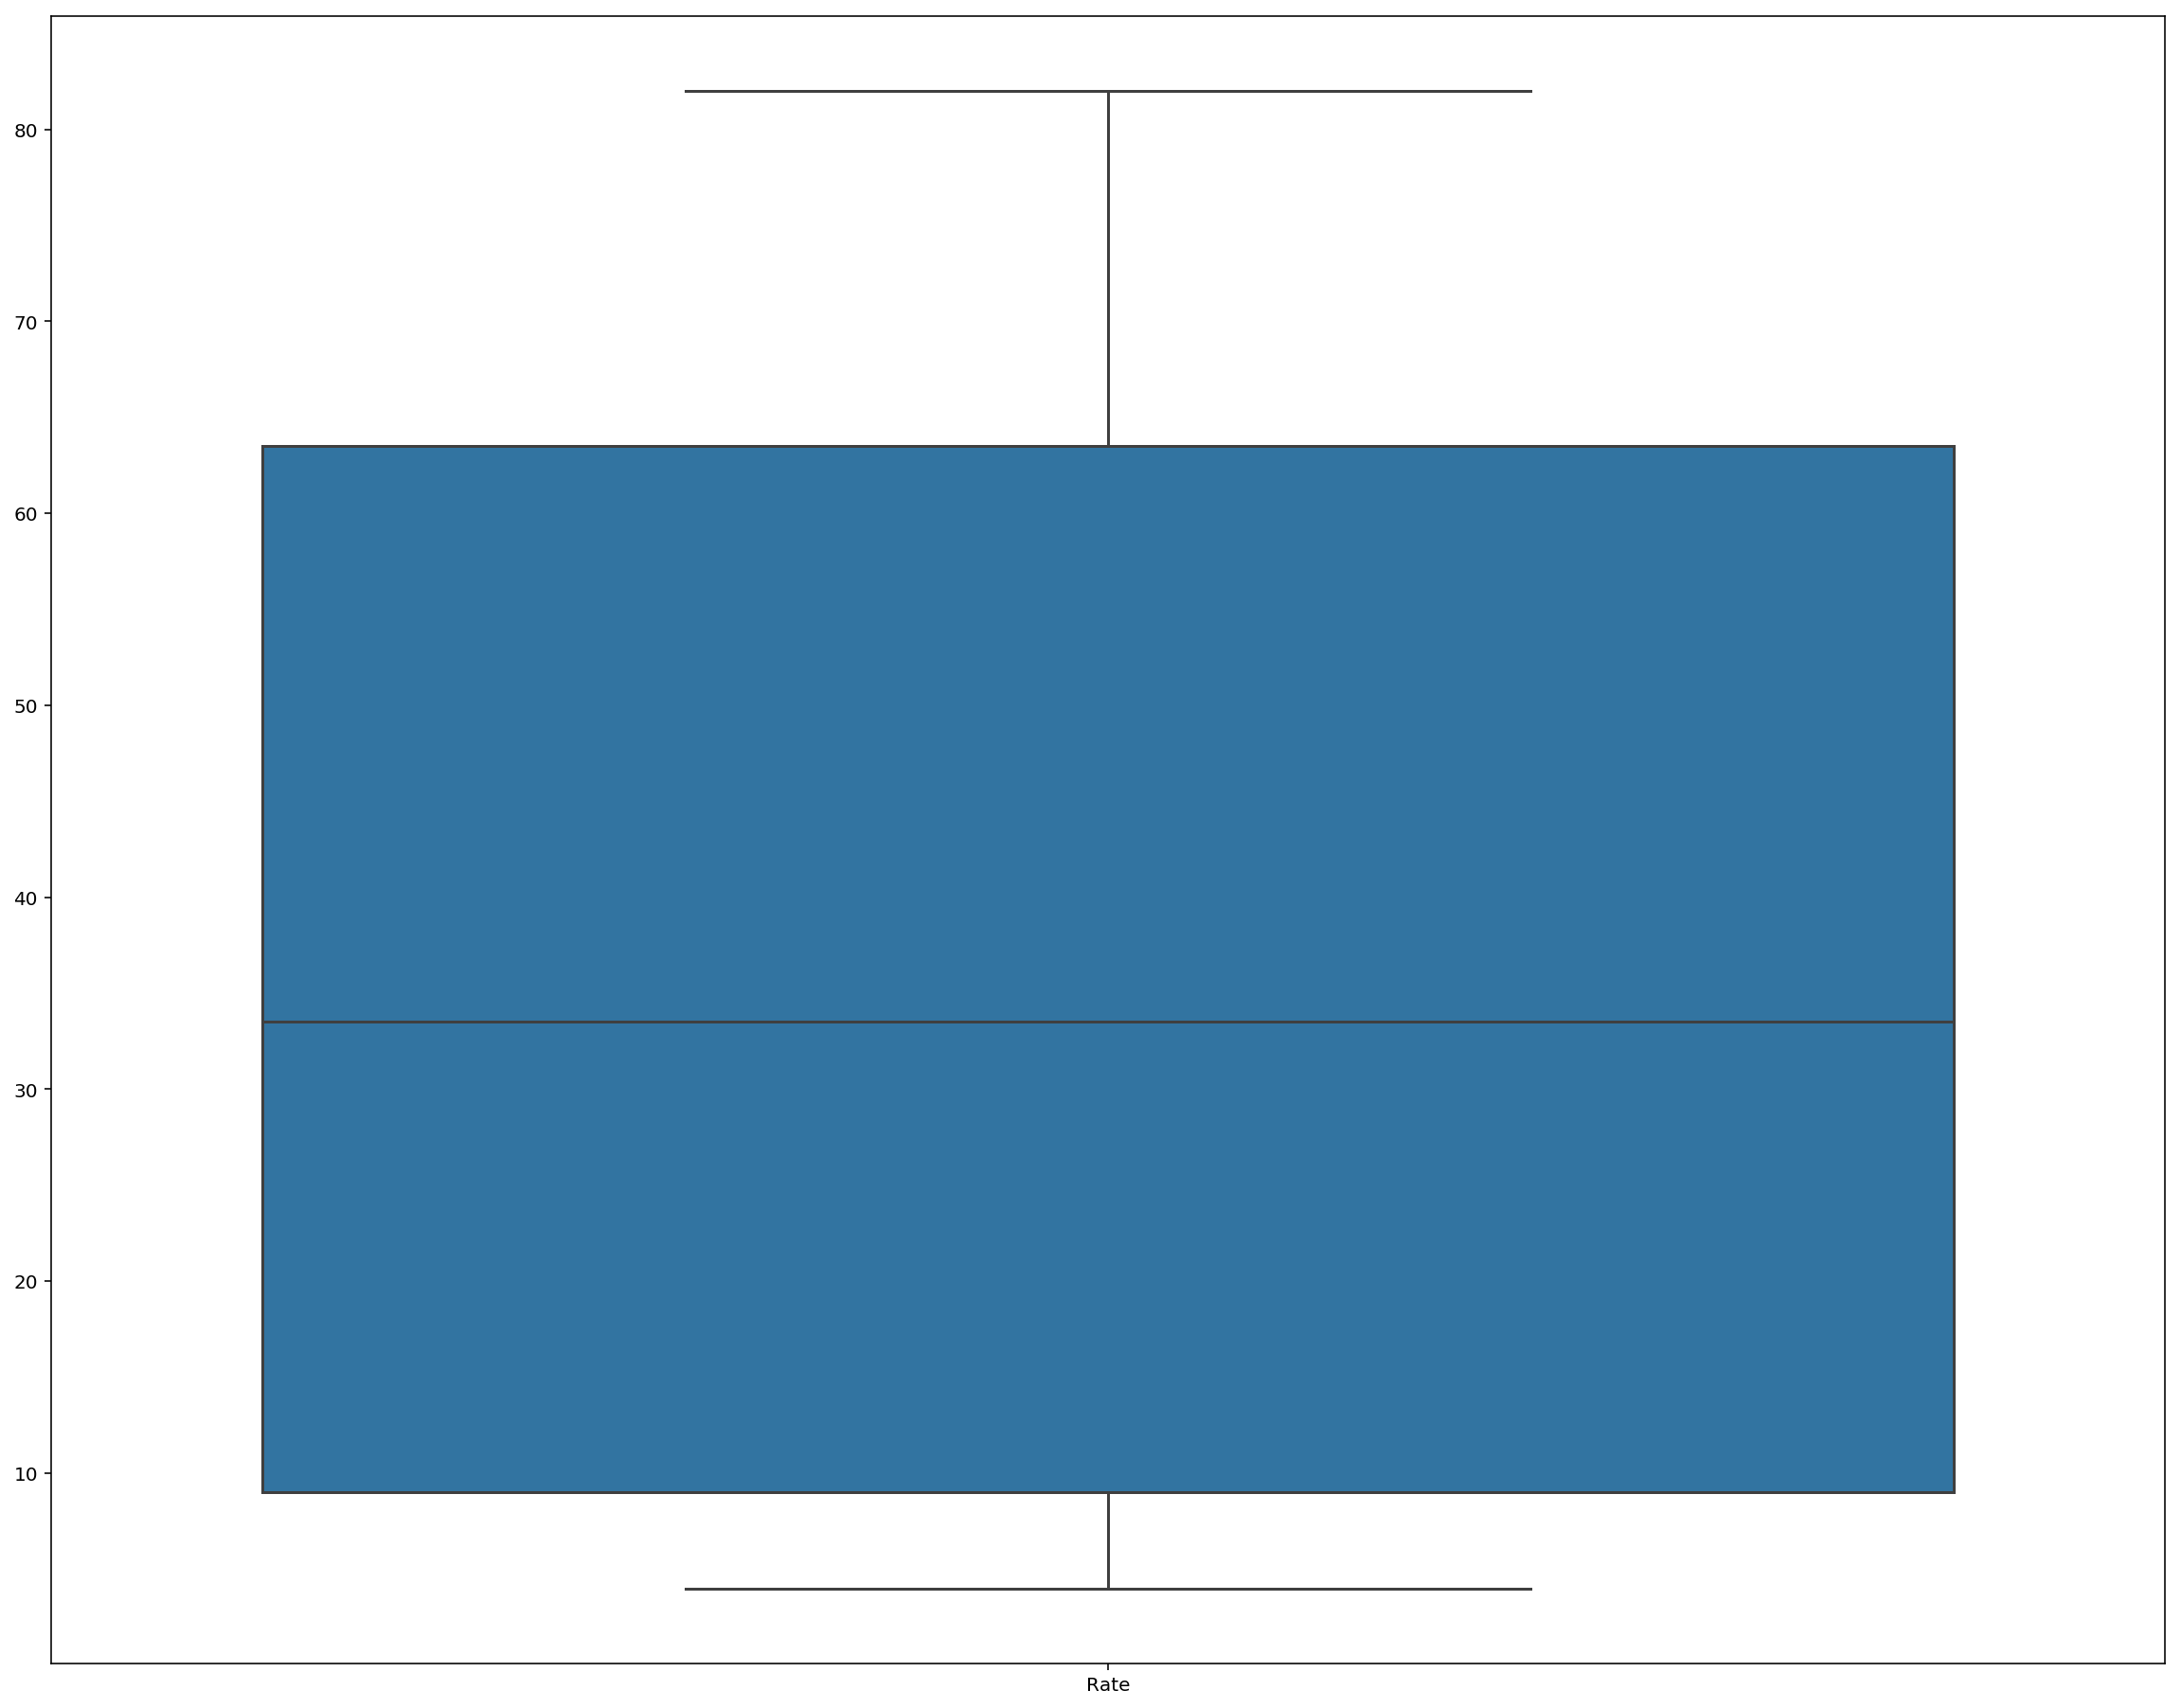

In [174]:
rate_var = df_sats[['Rate']]
plt.figure(figsize = (20,16))
sns.boxplot(data = rate_var)

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


# The Pearson correlation evaluates the linear relationship between two continuous variables.
# The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.
# Spearman correlation is often used to evaluate relationships involving ordinal variables.

In [139]:
a = df_sats[['Verbal', 'Math']]
a1 = a.corr(method='spearman')
a1



,Verbal,Math
Verbal,1.000000,0.905205
Math,0.905205,1.000000


In [140]:
a2 = a.corr(method='pearson')
a2

,Verbal,Math
Verbal,1.000000,0.899871
Math,0.899871,1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [142]:
df_sats['Rate Percentile'] = df_sats['Rate'].apply(lambda x: stats.percentileofscore(df_sats['Rate'],x))
df_sats[df_sats['State'] == 'CA']

,State,Rate,Verbal,Math,difference,Rate Percentile
23,CA,51,498,517,-19,56.730769


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

# Mean and median tend to hide outliers, since the majority of data is “normal”. 